<a href="https://colab.research.google.com/github/Harshad1025/Applied-Statistics-Project/blob/main/Assignment_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##**Task 1 - Basic CleanUp**

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
import pandas as pd                 # Data manipulation and analysis
import numpy as np                  # Fundamental package for scientific computing
import scipy.stats as stat         # Statistical functions and tests
import math                        # Mathematical functions
import seaborn as sns              # Statistical data visualization
import matplotlib.pyplot as plt    # Plotting library
import statsmodels.api as sm

In [ ]:
# load the data set
data = pd.read_excel('https://github.com/Harshad1025/Applied-Statistics-Project/raw/main/Superstore%20Marketing%20Data.xlsx', sheet_name='Sheet1')

In [ ]:
# Shape of the data
rows = data.shape[0]
cols = data.shape[1]
print(f'The dataset has {rows} rows and {cols} columns.')


The dataset has 2240 rows and 22 columns.


In [ ]:
# first view of dataset
data.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3    ########        0        10  ...                0                 0   
4    ########        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  Complain  
0                  6                  1         1         0  
1                  7                  5         1         0  
2                  5                  2         0         0  
3                  2                  7         0         0  
4                  2                  7         1         0  

[5 rows x 22 columns]

In [ ]:
# display all columns
pd.set_option('display.max_column',None)

In [ ]:
data.tail()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1    ########       99       372         18              126   
2236         0   1/22/2013       99         5         10               13   
2237         0    ########       99       185          2               88   
2238         0  11/29/2012       99       267         38              701   
2239         2    ########       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   
2239              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  Response  Complain  
2235                  4         0         0  
2236                  8         0         0  
2237                  8         0         0  
2238                  3         0         0  
2239                  7         1         0

In [ ]:
data.sample(5)

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
1860  10675        1956         PhD        Married  66334.0        0   
1645   4252        1965  Graduation        Married  44375.0        0   
1949   7592        1946         PhD        Married  51012.0        0   
1123   4268        1959  Graduation        Married  53154.0        0   
1514   5113        1971         PhD       Divorced  86979.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1860         1    ########       82       909         11              218   
1645         1   3/23/2014       73       213          5               28   
1949         0   4/18/2013       86       102          9               63   
1123         1    ########       50       129          0               21   
1514         0    ########       67       584        100              835   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1860                0                 0            23                  2   
1645                7                 7            41                  1   
1949                2                 9            24                  1   
1123                0                 1             7                  1   
1514               65                83            35                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1860                9                    3                  5   
1645                4                    1                  6   
1949                4                    1                  4   
1123                3                    1                  4   
1514                5                    5                  5   

      NumWebVisitsMonth  Response  Complain  
1860                  5         1         0  
1645                  5         0         0  
1949                  6         0         0  
1123                  4         0         0  
1514                  2         1         0

In [ ]:
# Concise summary of the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# check for duplicate values
data.duplicated().sum()

0

In [ ]:
# Check for null values
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# Make a copy of the original dataset
df = data.copy()


In [ ]:
# check unique entries in categorical columns
specified_col = ['Education','Marital_Status']
for col in specified_col:
    print(df[col].unique())
    print("-"*50)

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
--------------------------------------------------
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
--------------------------------------------------


In [ ]:
# strip whitespace from all string values in the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
# Replace '########' with NaN
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NaT)

# Convert the column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Display the first few rows to verify the changes
print(df['Dt_Customer'].head())


0   2014-06-16
1   2014-06-15
2   2014-05-13
3          NaT
4          NaT
Name: Dt_Customer, dtype: datetime64[ns]


In [ ]:
# Forward fill missing values in 'Dt_Customer' column
df['Dt_Customer'].ffill(inplace=True)

In [ ]:
# Calculate the age of customers at the time of becoming a customer
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [ ]:
# Calculate the total amount spent by summing up spending on different product categories
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']



In [ ]:
# Drop the 'Id' column as it is not needed for analysis
df.drop(columns=['Id'], inplace=True)


In [ ]:
# missing values %
print(np.round((df['Income'].isnull().sum()/df.shape[0])*100,2),'%')

1.07 %


### Outliers and Missing Values Treatment



In [ ]:
# check for null values in incoe column
df[df['Income'].isnull()].head()

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
134        1957         PhD        Married     NaN        2         1   
262        1983  Graduation        Married     NaN        1         0   
394        1972         PhD       Together     NaN        1         0   
449        1986  Graduation         Single     NaN        1         0   
525        1961         PhD        Married     NaN        0         1   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
134  2012-11-19        4       230         42              192   
262  2013-11-15       11         5          5                6   
394  2014-06-19       17        25          1               13   
449  2013-02-20       19         5          1                3   
525  2013-10-16       23       352          0               27   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
134               49                37            53                 12   
262                0                 2             1                  1   
394                0                 0             3                  1   
449                3               263           362                  0   
525               10                 0            15                  3   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
134                7                    2                  8   
262                1                    0                  2   
394                1                    0                  3   
449               27                    0                  0   
525                6                    1                  7   

     NumWebVisitsMonth  Response  Complain  Age  Total_Spent  
134                  9         0         0   55          603  
262                  7         0         0   30           19  
394                  7         0         0   42           42  
449                  1         0         0   27          637  
525                  6         0         0   52          404

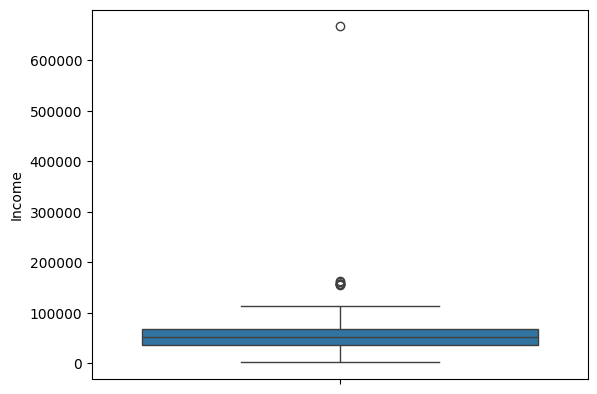

In [ ]:
# check for the distribution of income column for replacing the null values
sns.boxplot(df['Income'])
plt.show()

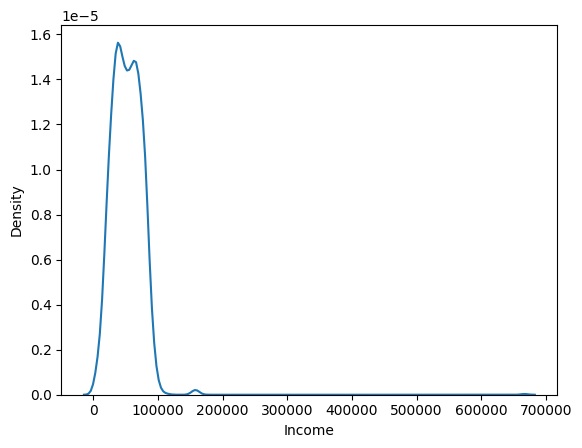

In [ ]:
# Plot Kernel Density Estimate (KDE) plot for the 'Income' column
sns.kdeplot(df['Income'])

# Show the plot
plt.show()


In [ ]:
# Calculate the skewness of the 'Income' column in the DataFrame
df['Income'].skew()


6.763487372811116

In [ ]:
# Outiliers detection
def detect_outliers_iqr(df, column_name):
    # Select the column of interest
    data_ = df[column_name]

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data_.quantile(0.25)
    Q3 = data_.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (data_ < lower_bound) | (data_ > upper_bound)
    return df[outliers]


In [ ]:
# Detect outliers in the 'Income' column using the Interquartile Range (IQR) method
detect_outliers_iqr(df, 'Income').head()


Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
325        1977  Graduation       Together  157146.0        0         0   
497        1982         PhD        Married  160803.0        0         0   
527        1977  Graduation       Together  666666.0        1         0   
731        1976         PhD       Together  162397.0        1         1   
853        1971      Master       Together  157733.0        1         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
325  2013-04-29       13         1          0             1725   
497  2012-08-26       21        55         16             1622   
527  2013-10-16       23         9         14               18   
731  2013-11-19       31        85          1               16   
853  2013-06-22       37        39          1                9   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
325                2                 1             1                  0   
497               17                 3             4                 15   
527                8                 1            12                  4   
731                2                 1             2                  0   
853                2                 0             8                  0   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
325                0                   28                  0   
497                0                   28                  1   
527                3                    1                  3   
731                0                    0                  1   
853                1                    0                  1   

     NumWebVisitsMonth  Response  Complain  Age  Total_Spent  
325                  1         0         0   36         1730  
497                  0         0         0   30         1717  
527                  6         0         0   36           62  
731                  1         0         0   37          107  
853                  1         0         0   42           59

In [ ]:
# Outliers treatment using Winsorization
def outliers_treatment(df, col):
    """
    Treat outliers in a specified column of a DataFrame using Winsorization technique.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - col (str): The name of the column in which outliers are to be treated.

    Returns:
    - None: Modifies the DataFrame in place by capping outliers within a specified range.
    """

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers using lower and upper bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, np.where(df[col] > upper_bound, upper_bound, df[col]))


In [ ]:
# Treat outliers in the 'Income' column of the DataFrame using Winsorization technique
outliers_treatment(df, 'Income')


In [ ]:
# Display summary statistics of the 'Income' column after outliers treatment
df['Income'].describe()


count      2216.000000
mean      51874.493231
std       21059.740890
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      118350.500000
Name: Income, dtype: float64

In [ ]:
# Calculate the mean and median of the 'Income' column in the DataFrame
mean_income = df['Income'].mean()
median_income = df['Income'].median()

mean_income, median_income


(51874.49323104693, 51381.5)

In [ ]:
# Since the mean and median of the 'Income' column are nearly equal,
# we can use the mean value to replace missing values in the column.

df['Income'].fillna(df['Income'].mean(), inplace=True)


In [ ]:
df['Income'].isnull().sum()

0

### Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

#### **Age**

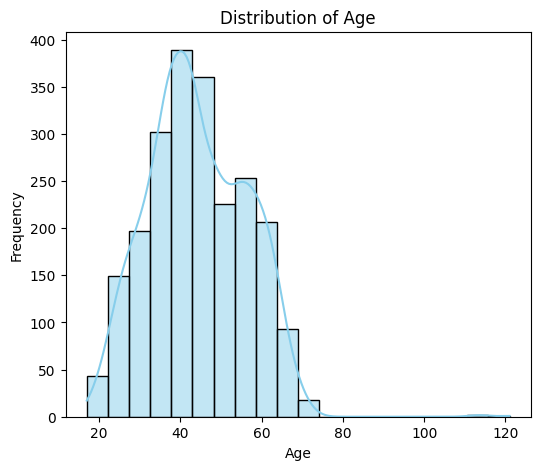

Descriptive Statistics for Age:
count    2240.000000
mean       44.230804
std        12.031923
min        17.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64


In [ ]:


# Descriptive statistics for age
age_stats = df['Age'].describe()

# Visualizations for age distribution
plt.figure(figsize=(6, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Display descriptive statistics for age
print("Descriptive Statistics for Age:")
print(age_stats)


#### **Birth Year**

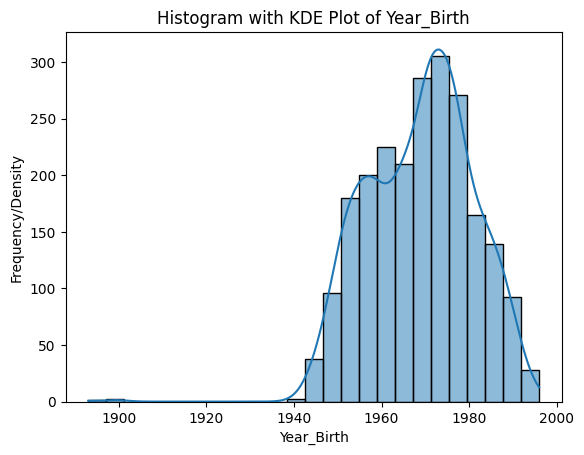

In [ ]:
# Histogram with KDE Plot of Year_Birth

sns.histplot(df['Year_Birth'], bins=25, kde=True, edgecolor='black')
plt.xlabel('Year_Birth')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Plot of Year_Birth')
plt.show()



#### **Education**

In [ ]:
df['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

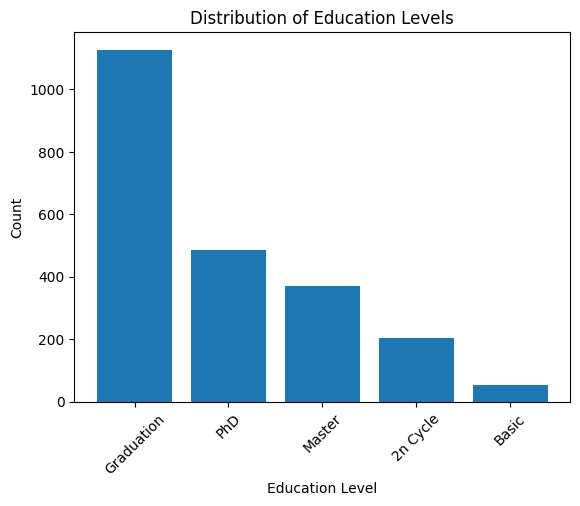

In [ ]:
education_counts = df['Education'].value_counts()

# Create a bar plot
plt.bar(education_counts.index, education_counts.values,)

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.show()


#### **marital status**

In [ ]:
df['Marital_Status'].describe()

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

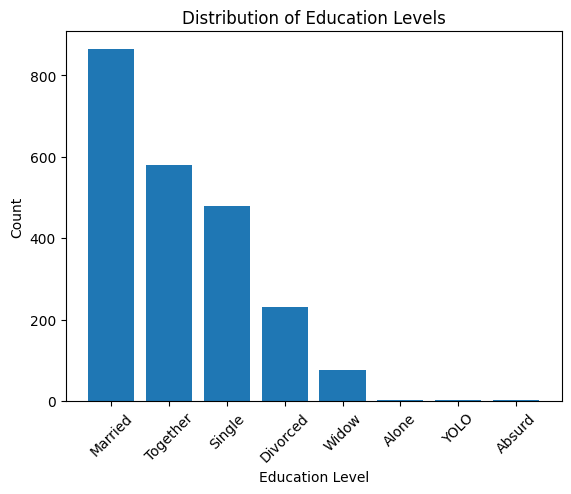

In [ ]:

education_counts = df['Marital_Status'].value_counts()

# Create a bar plot
plt.bar(education_counts.index, education_counts.values)

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.show()


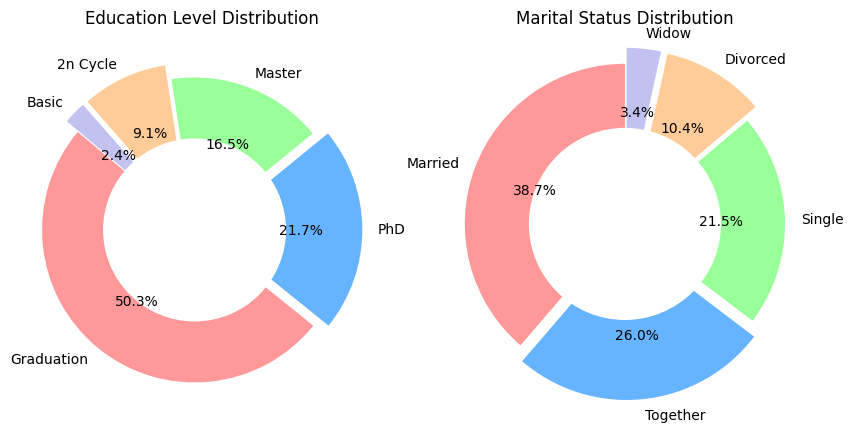

In [ ]:
# Define custom colors for the pie charts
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Data for the first donut chart
education_data = df['Education'].value_counts().reset_index()

# Data for the second donut chart
marital_data = df['Marital_Status'].value_counts().reset_index()[0:5]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Explodes for donut charts
explode1 = (0, 0.1, 0, 0.1, 0.1)
explode2 = (0, 0.1, 0, 0.1, 0.1)

# Inner radius for first and second donut charts
inner_radius2 = 0.6
inner_radius1 = 0.6

# Plot the first donut chart
patches1, _, _ = axs[0].pie(education_data['Education'], labels=education_data['index'], explode=explode1, autopct='%1.1f%%', startangle=140, colors=colors)
centre_circle1 = plt.Circle((0,0), inner_radius1, fc='white')
axs[0].add_artist(centre_circle1)
axs[0].set_title('Education Level Distribution')

# Plot the second donut chart
axs[1].pie(marital_data['Marital_Status'], labels=marital_data['index'], explode=explode2, autopct='%1.1f%%', startangle=90, colors=colors)
centre_circle2 = plt.Circle((0,0), inner_radius2, fc='white')
axs[1].add_artist(centre_circle2)
axs[1].set_title('Marital Status Distribution')

# Equal aspect ratio ensures that pies are drawn as circles
for ax in axs:
    ax.axis('equal')

# Show the plots
plt.show()




**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

Cleaned and Preprocessed Dataset:
---

**Handling Missing Values:**
- **Identification:** Missing values were identified in the 'income' column, comprising approximately 1.07% of the dataset.

- **Outlier Handling:** Outliers in the 'income' column were addressed using Winsorization to ensure data integrity.

- **Imputation:** Missing values in the 'income' column were replaced with the mean value to maintain the income distribution.

**Consistent Data Types:**

- **Handling Date and Time Data:**
    - The 'Dt_Customer' column, representing the date of customer registration, was converted to datetime objects using `pd.to_datetime()`.
    - Invalid date formats like '########' were handled by converting them to NaN values and then replaced by forward fill method.

- **Age Calculation:**
    - A new column 'Age' was created by calculating the age of customers based on their enrollment date and birth year.

- **Total Spending Calculation:**
    - A new column 'Total_Spent' was created by summing up spending on different products including wines, fruits, meat products, fish products, sweet products, and gold products.

- **Appropriate Data Types:**
    - All columns are represented using appropriate data types.

- **Data Type Consistency:**
    - Uniform data types across variables have been maintained, ensuring accurate analysis and dataset integrity. Further conversions will be performed if necessary for specific analytical tasks.

**Removed Unnecessary Column:**

- The 'Id' column was removed from the dataset as it was deemed unnecessary for analysis.





| Variable | Count | Mean | Standard Deviation | Minimum | 25th Percentile | 50th Percentile | 75th Percentile | Maximum |
|---|---|---|---|---|---|---|---|---|
| Year_Birth | 2240.0 | 1968.8 | 11.98 | 1893.0 | 1959.0 | 1970.0 | 1977.0 | 1996.0 |
| Income | 2216.0 | 51874.49 | 21059.74 | 1730.0 | 35303.0 | 51381.5 | 68522.0 | 118350.5 |



##**Task 2 - Descriptive Statistics** 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
temp_num_col = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        temp_num_col.append(col)

print("Numerical columns:", temp_num_col)


Numerical columns: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'Total_Spent']


In [ ]:
# creted a list of numerical columns
num_col = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Age', 'Total_Spent']

In [ ]:
# Outlier detection
def detect_outliers_iqr(df, numerical_columns):
    outliers_dict = {}

    for column_name in numerical_columns:
        # Select the column of interest
        data_column = df[column_name]

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)

        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(data_column < lower_bound) | (data_column > upper_bound)]

        if not outliers.empty:
            outliers_dict[column_name] = outliers[column_name].tolist()

    return outliers_dict

# Example usage:
numerical_columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts']
outliers_dict = detect_outliers_iqr(df, numerical_columns)

# Print column names and outliers present in the dataset
for column_name, outliers in outliers_dict.items():
    print(f"{column_name} and outliers = {outliers}")


Income and outliers = [118350.5, 118350.5, 118350.5, 118350.5, 118350.5, 118350.5, 118350.5, 118350.5]
MntWines and outliers = [1285, 1248, 1285, 1296, 1462, 1478, 1478, 1302, 1239, 1349, 1308, 1230, 1332, 1253, 1394, 1276, 1288, 1493, 1311, 1486, 1492, 1492, 1259, 1241, 1245, 1459, 1379, 1285, 1298, 1315, 1396, 1324, 1449, 1252, 1279]
MntFruits and outliers = [104, 130, 82, 174, 169, 107, 105, 105, 96, 86, 193, 83, 148, 83, 103, 142, 97, 117, 134, 153, 148, 83, 142, 106, 88, 88, 153, 133, 99, 129, 129, 93, 107, 86, 185, 162, 168, 98, 129, 172, 140, 194, 91, 183, 134, 151, 197, 185, 178, 189, 102, 155, 115, 98, 98, 90, 83, 83, 114, 99, 93, 199, 199, 154, 183, 123, 108, 133, 137, 137, 91, 151, 129, 120, 120, 108, 108, 107, 84, 142, 129, 112, 183, 129, 178, 129, 151, 160, 114, 159, 111, 147, 143, 161, 144, 112, 112, 181, 133, 89, 97, 102, 105, 114, 114, 142, 155, 137, 107, 107, 147, 161, 168, 162, 115, 115, 84, 84, 132, 137, 117, 138, 108, 123, 184, 97, 86, 122, 114, 105, 111, 120, 194, 

In [ ]:
# Display descriptive statistics for numerical columns
df[num_col].describe()


Income      Kidhome     Teenhome      Recency     MntWines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    51874.493231     0.444196     0.506250    49.109375   303.935714   
std     20946.566362     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51741.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    118350.500000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2240.000000        2240.000000      2240.000000          2240.000000   
mean      44.021875           2.325000         4.084821             2.662054   
std       52.167439           1.932238         2.778714             2.923101   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth          Age  Total_Spent  
count        2240.000000        2240.000000  2240.000000  2240.000000  
mean            5.790179           5.316518    44.230804   605.798214  
std             3.250958           2.426645    12.031923   602.249288  
min             0.000000           0.000000    17.000000     5.000000  
25%             3.000000           3.000000    36.000000    68.750000  
50%             5.000000           6.000000    43.000000   396.000000  
75%             8.000000           7.000000    54.000000  1045.500000  
max            13.000000          20.000000   121.000000  2525.000000

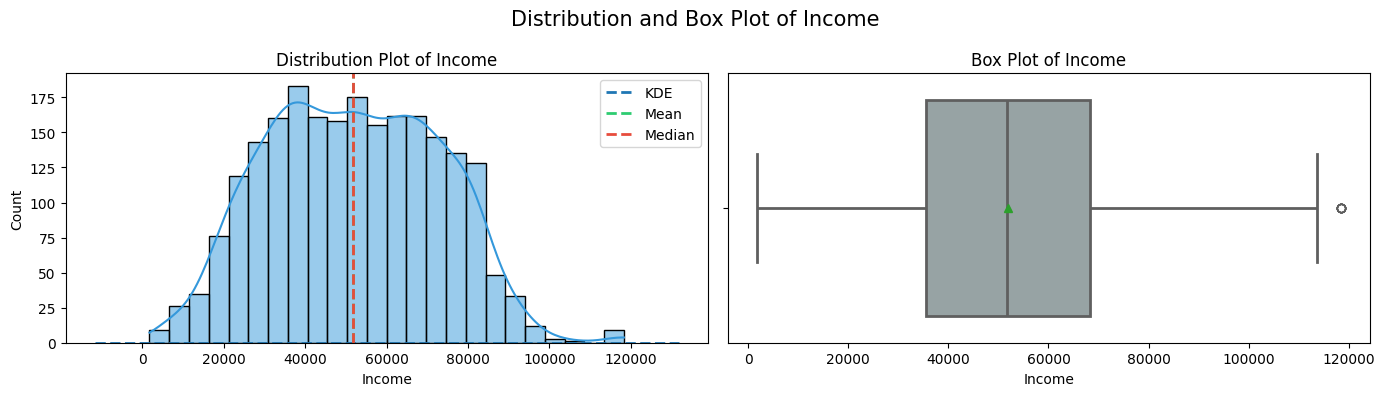

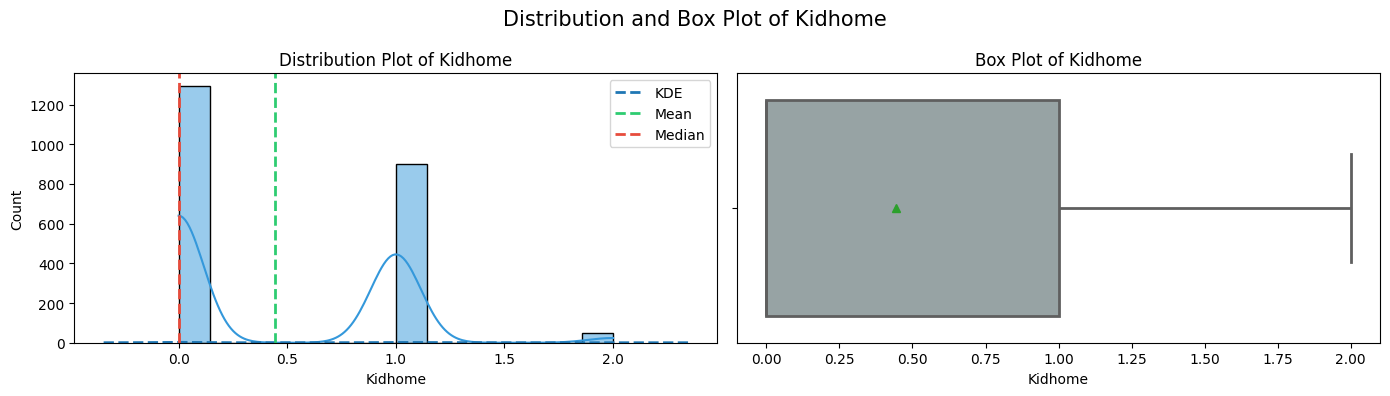

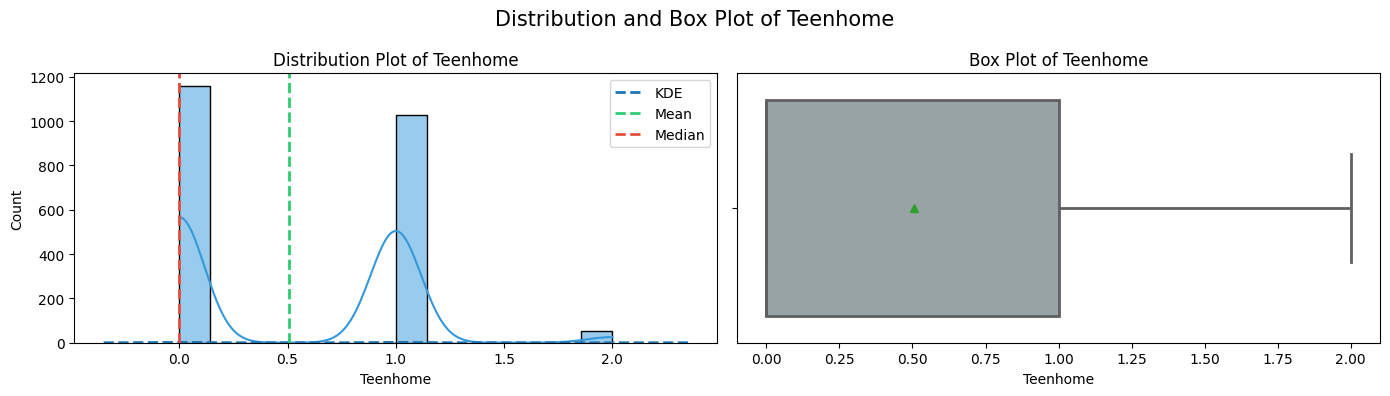

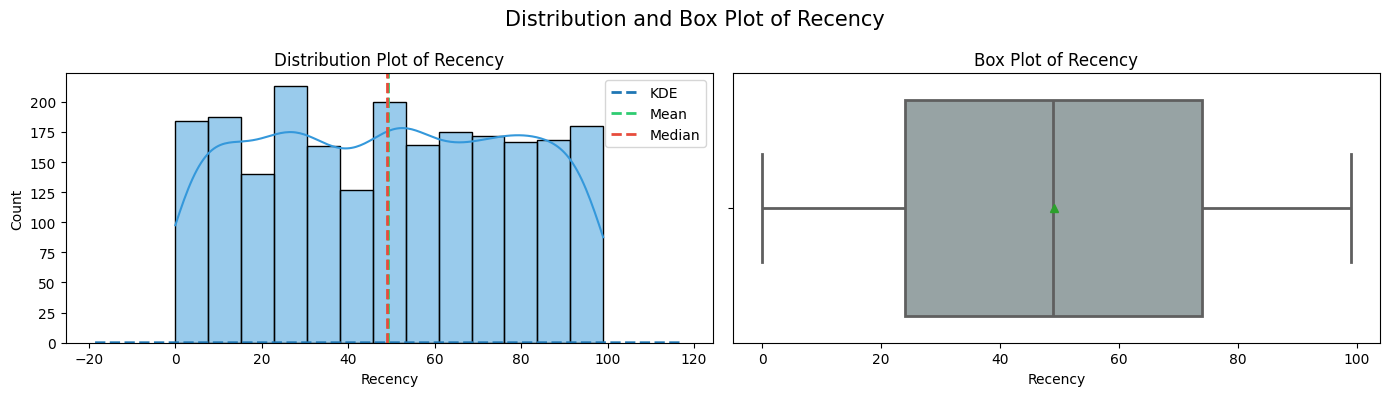

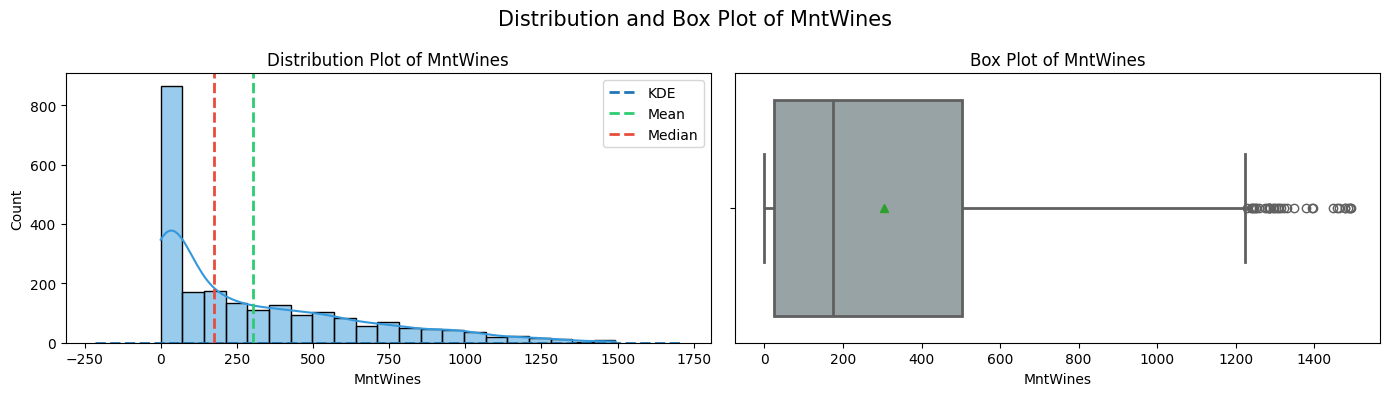

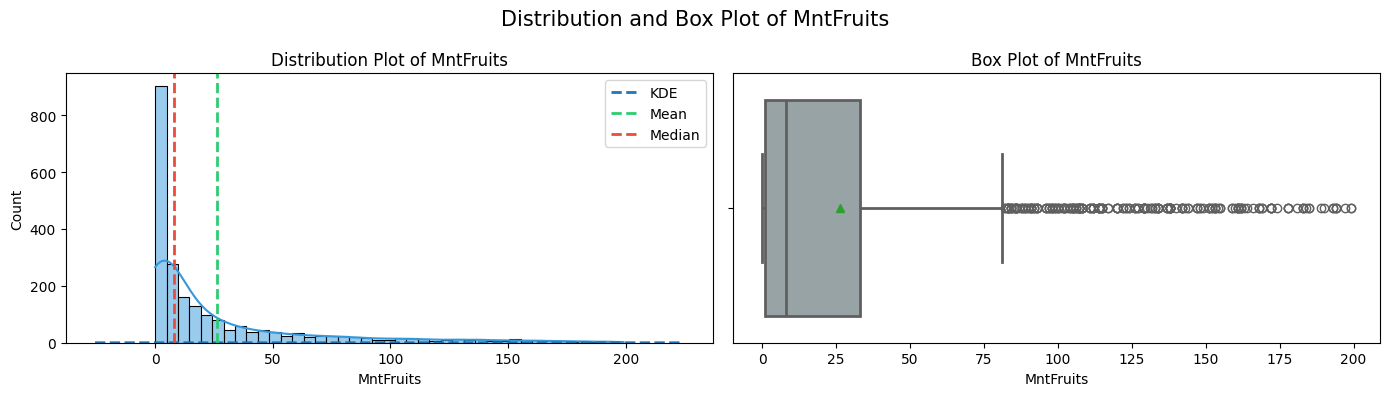

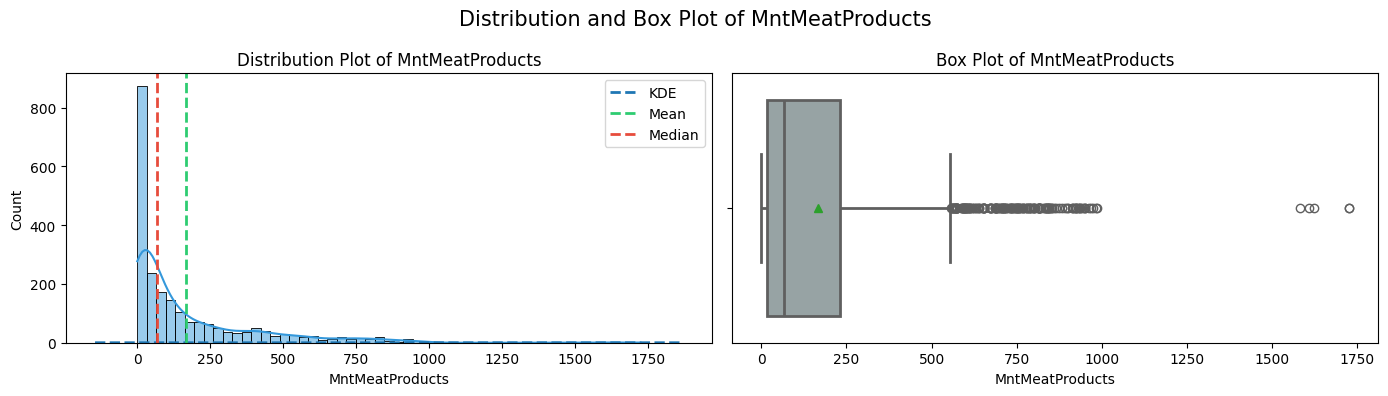

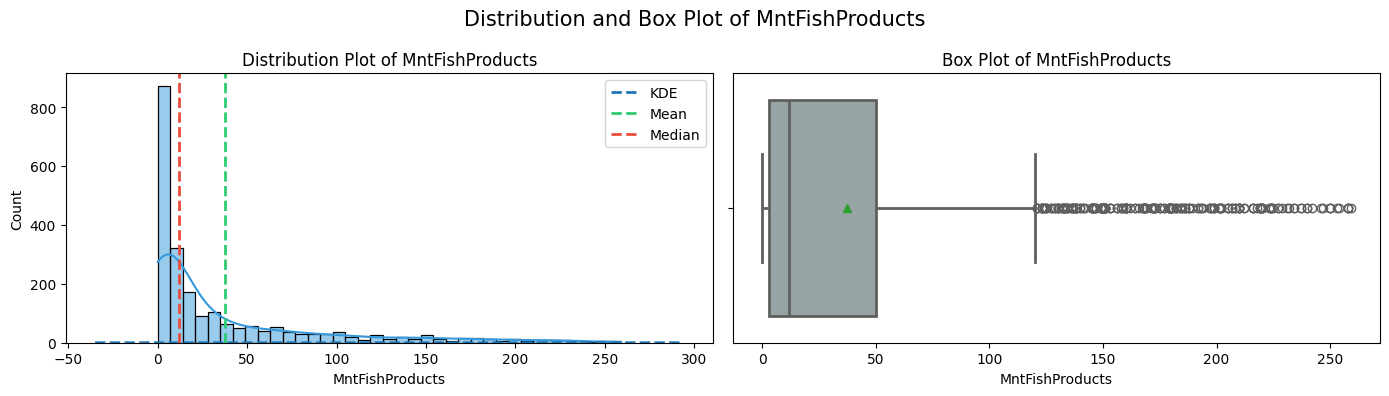

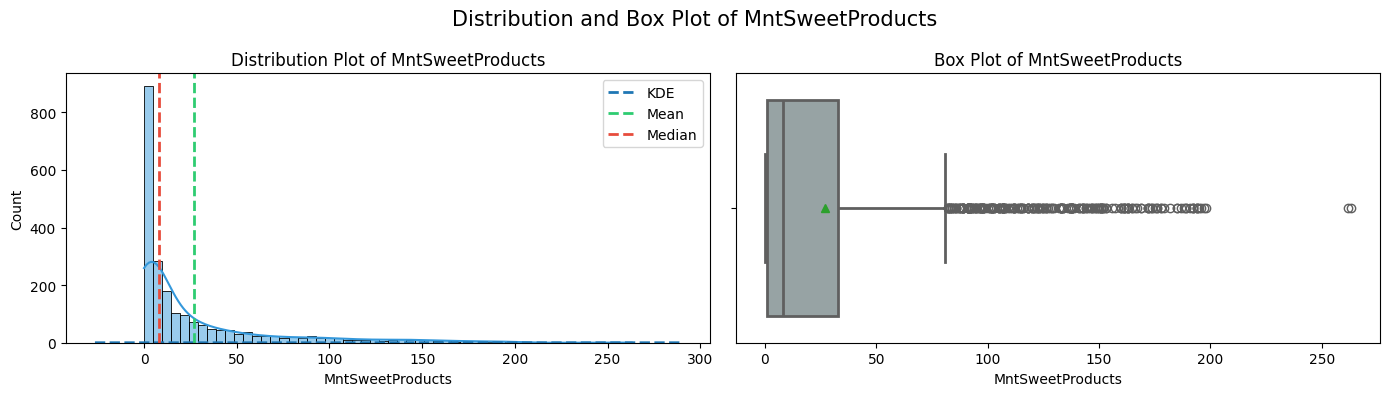

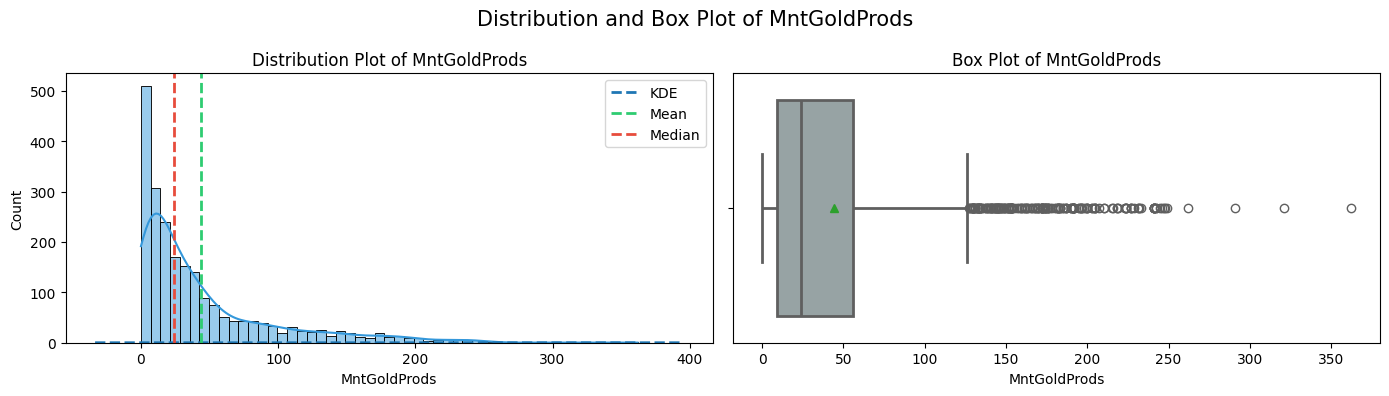

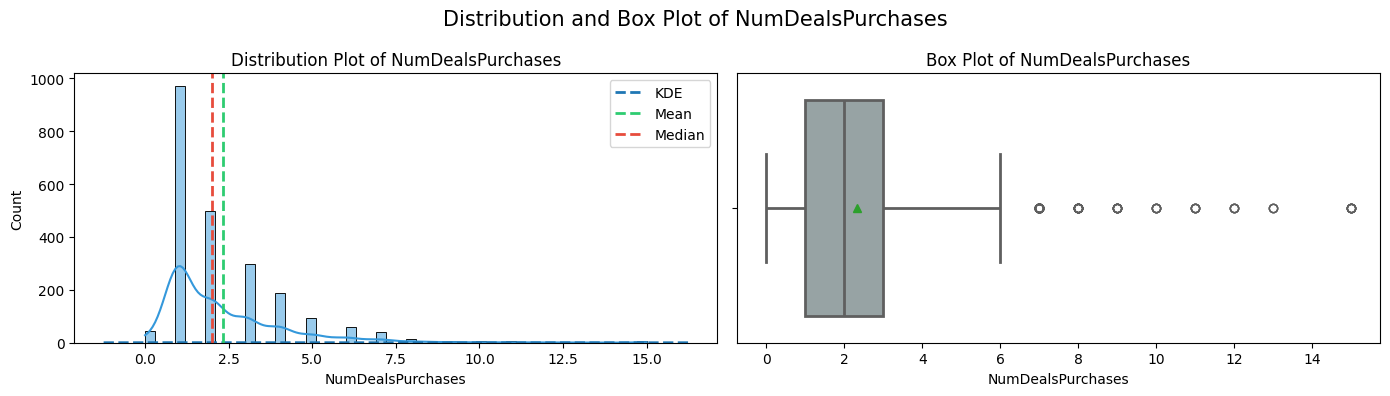

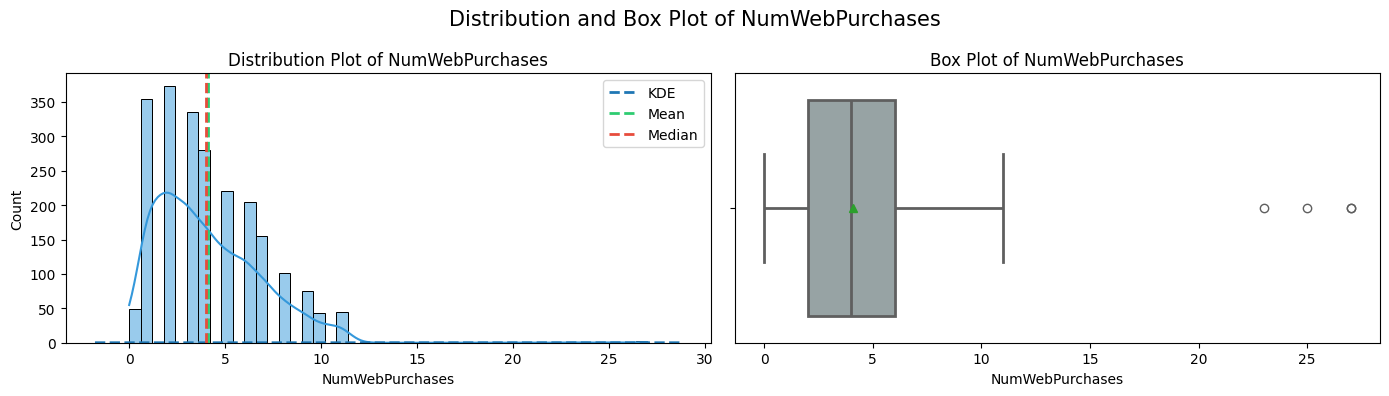

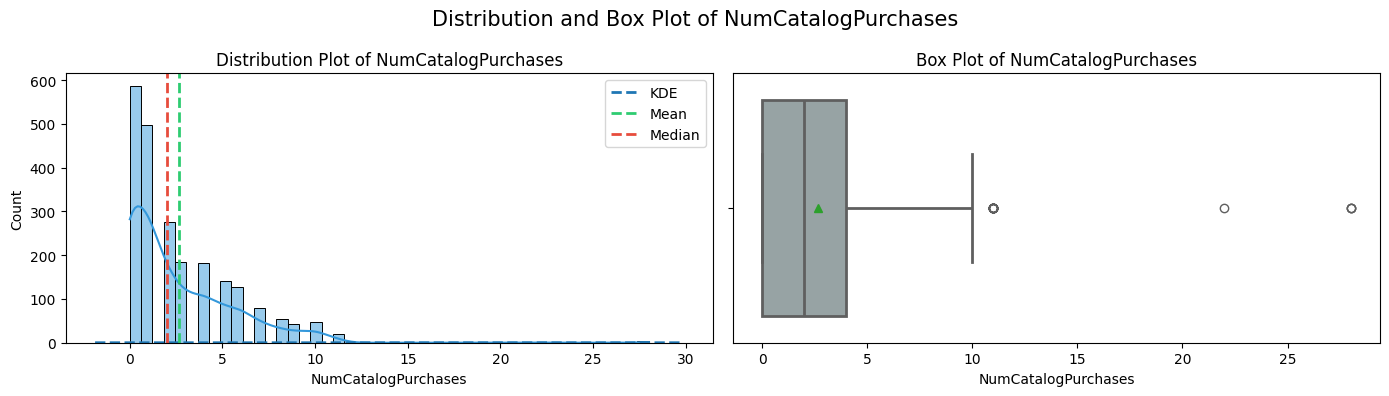

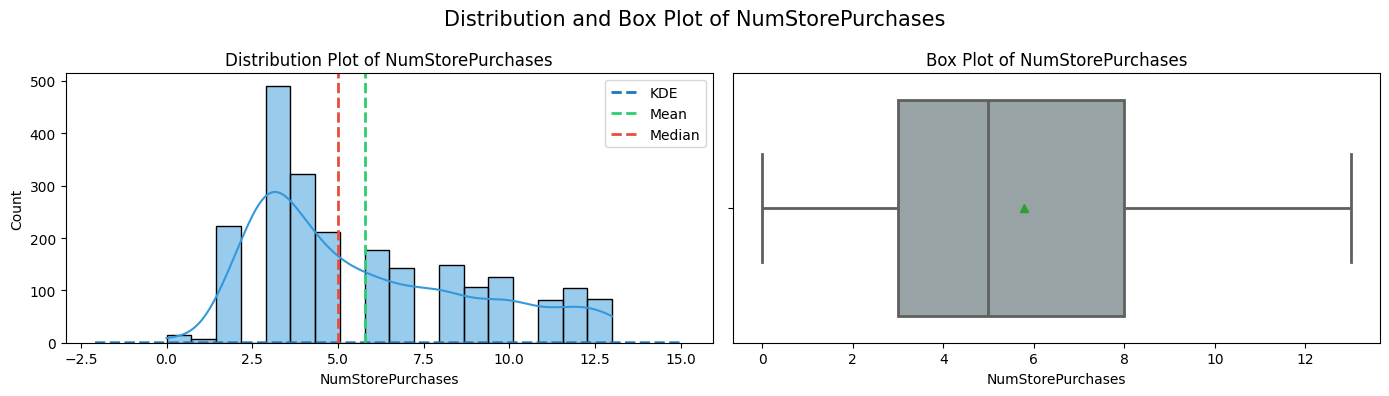

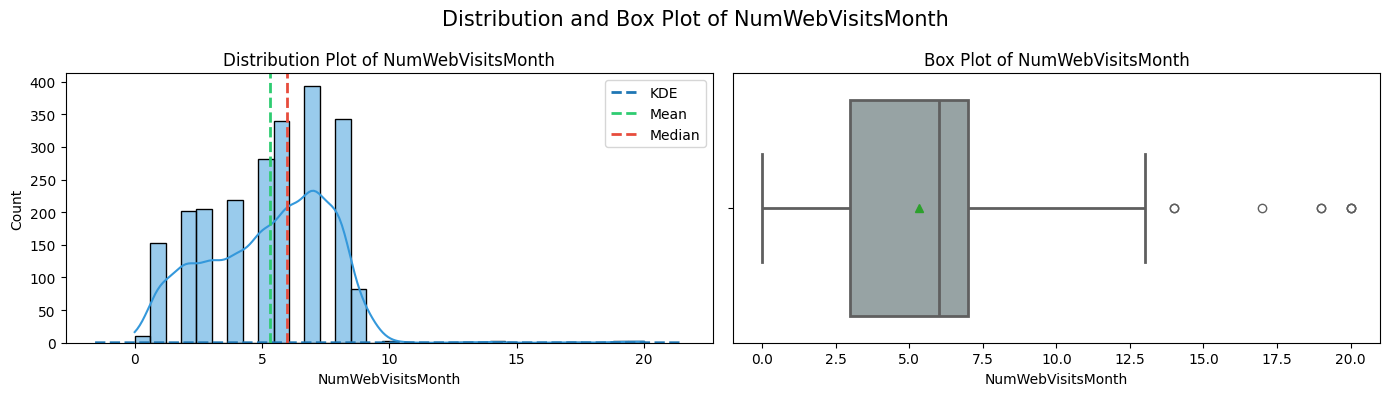

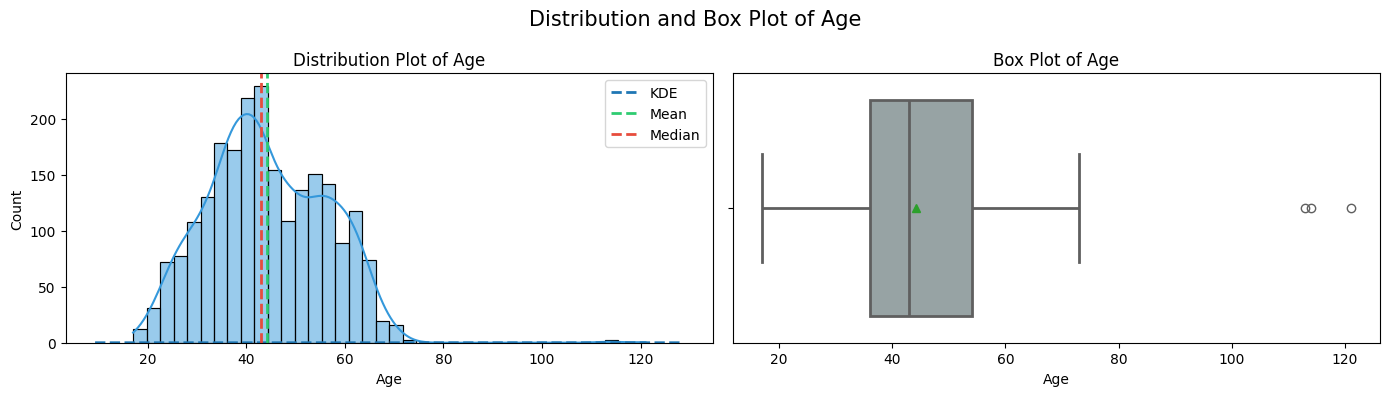

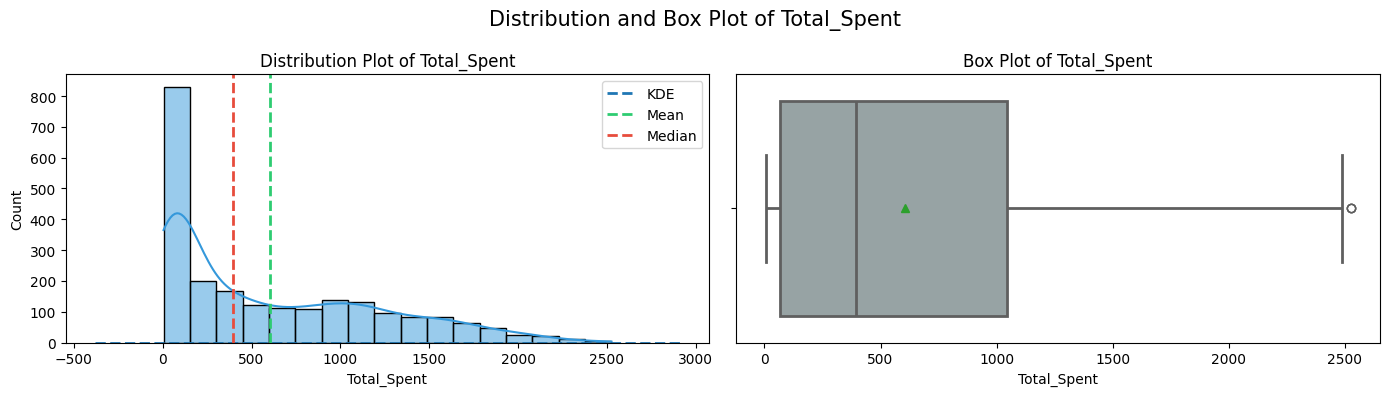

In [ ]:
# Get summary statistics for numerical columns in the DataFrame
numeric_summary = df[num_col].describe()

# Plot distribution and box plots for each numerical column
for col in numeric_summary.columns:
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

    # Distribution plot with KDE
    sns.histplot(df[col], ax=axes[0], kde=True, color='#3498db', edgecolor='black')
    sns.kdeplot(df[col], ax=axes[0], linestyle='--', linewidth=2, label='KDE')
    axes[0].axvline(df[col].mean(), color='#2ecc71', linestyle='--', linewidth=2, label='Mean')
    axes[0].axvline(df[col].median(), color='#e74c3c', linestyle='--', linewidth=2, label='Median')
    axes[0].set_title(f'Distribution Plot of {col}')
    axes[0].legend()

    # Box plot with means highlighted
    sns.boxplot(df[col], ax=axes[1], orient='h', showmeans=True, color='#95a5a6', linewidth=2)
    axes[1].set_title(f'Box Plot of {col}')

    # Adjust layout and display title
    fig.suptitle(f'Distribution and Box Plot of {col}', fontsize=15)
    plt.tight_layout()
    plt.show()


In [ ]:
num_df = df[num_col]

In [ ]:
# mean values
num_df.mean()

Income                 51874.493231
Kidhome                    0.444196
Teenhome                   0.506250
Recency                   49.109375
MntWines                 303.935714
MntFruits                 26.302232
MntMeatProducts          166.950000
MntFishProducts           37.525446
MntSweetProducts          27.062946
MntGoldProds              44.021875
NumDealsPurchases          2.325000
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
NumStorePurchases          5.790179
NumWebVisitsMonth          5.316518
Age                       44.230804
Total_Spent              605.798214
dtype: float64

In [ ]:
# variance
num_df.var()

Income                 4.387586e+08
Kidhome                2.898725e-01
Teenhome               2.965219e-01
Recency                8.388237e+02
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
Age                    1.447672e+02
Total_Spent            3.627042e+05
dtype: float64

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  


Descriptive Statistics
---


#### Categorical Variables

- **Response and Complain:** These are categorical variables.

#### Outlier Detection

I have identified outliers in the following columns:
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases

These outliers may need further analysis and can be managed using techniques like Winsorization or removal, depending on the specific needs of the dataset and analysis goals.

#### Handling Outliers

- Outliers in the 'Income' column have been addressed using Winsorization to ensure data integrity.

#### Descriptive Statistics of Numerical Columns

The descriptive statistics for numerical columns are presented in the table below:

|                   | Mean       | Standard Deviation |
|-------------------|------------|--------------------|
| Income            | 51871.1566 | 438317900.0000     |
| Kidhome           | 0.4442     | 0.2899             |
| Teenhome          | 0.5063     | 0.2965             |
| Recency           | 49.1094    | 838.8237           |
| MntWines          | 303.9357   | 113297.8361        |
| MntFruits         | 26.3022    | 1581.9259          |
| MntMeatProducts   | 166.9500   | 50947.4288         |
| MntFishProducts   | 37.5254    | 2984.3246          |
| MntSweetProducts  | 27.0629    | 1704.0801          |
| MntGoldProds      | 44.0219    | 2721.4423          |
| NumDealsPurchases | 2.3250     | 3.7335             |
| NumWebPurchases   | 4.0848     | 7.7213             |
| NumCatalogPurchases | 2.6621   | 8.5445             |
| NumStorePurchases | 5.7902     | 10.5687            |
| NumWebVisitsMonth | 5.3165     | 5.8886             |
| Age               | 44.2308    | 144.7672           |
| Total_Spent       | 605.7982   | 362704.2297        |

---



## **Task 3 - Probability Distribution**s 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



### Normal distribution check

##### **Normality Check using Shapiro-Wilk Test**

In [ ]:
import scipy.stats as stat

# Check for normal distribution in numerical columns using Shapiro-Wilk test
for col in num_col:
    # Perform Shapiro-Wilk test
    _, p_value = stat.shapiro(df[col])

    # Set significance level
    alpha = 0.05

    # Determine normality based on p-value
    if p_value > alpha:
        print(f"{col} is normally distributed (p-value: {p_value})")
        print()
    else:
        print(f"{col} is not normally distributed (p-value: {p_value})")
        print()





Income is not normally distributed (p-value: 4.498873604381892e-13)

Kidhome is not normally distributed (p-value: 0.0)

Teenhome is not normally distributed (p-value: 0.0)

Recency is not normally distributed (p-value: 5.698252316095217e-26)

MntWines is not normally distributed (p-value: 5.7032847498020055e-43)

MntFruits is not normally distributed (p-value: 0.0)

MntMeatProducts is not normally distributed (p-value: 0.0)

MntFishProducts is not normally distributed (p-value: 0.0)

MntSweetProducts is not normally distributed (p-value: 0.0)

MntGoldProds is not normally distributed (p-value: 0.0)

NumDealsPurchases is not normally distributed (p-value: 0.0)

NumWebPurchases is not normally distributed (p-value: 3.07018045318554e-36)

NumCatalogPurchases is not normally distributed (p-value: 4.203895392974451e-45)

NumStorePurchases is not normally distributed (p-value: 2.591058742010435e-35)

NumWebVisitsMonth is not normally distributed (p-value: 3.5143218581109955e-31)

Age is not

##### **Assessment of Normality**
- skewness
- kurtosis

In [ ]:
# Initialize an empty list to store column names with approximately normal distribution
appro_norm = []

# Iterate through numerical columns
for col in num_col:
    # Calculate skewness and kurtosis
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()

    # Print skewness and kurtosis for each column
    print(f"{col}: Skewness: {skewness}, Kurtosis: {kurtosis}")
    print()

    # Check if skewness is less than or equal to 0.5 (indicating approximate normality)
    if skewness <= 0.5:
        appro_norm.append(col)

# List columns with approximately normal distribution
print("Columns with approximately normal distribution (Skewness ≤ 0.5):", appro_norm)



Income: Skewness: 0.09341005674286579, Kurtosis: -0.6082544584595939

Kidhome: Skewness: 0.6352884633879473, Kurtosis: -0.779661490559199

Teenhome: Skewness: 0.4071148777989441, Kurtosis: -0.9862349387289968

Recency: Skewness: -0.0019866586335935076, Kurtosis: -1.2018967992387304

MntWines: Skewness: 1.1757705637550506, Kurtosis: 0.5987435935182432

MntFruits: Skewness: 2.1020633046228268, Kurtosis: 4.050976251101475

MntMeatProducts: Skewness: 2.083233112943474, Kurtosis: 5.516724101399635

MntFishProducts: Skewness: 1.9197689706698498, Kurtosis: 3.096460912277143

MntSweetProducts: Skewness: 2.136080712154738, Kurtosis: 4.376548260573509

MntGoldProds: Skewness: 1.8861056091894417, Kurtosis: 3.55170925005139

NumDealsPurchases: Skewness: 2.4185693876889256, Kurtosis: 8.936914320695886

NumWebPurchases: Skewness: 1.3827942964035893, Kurtosis: 5.703128364201298

NumCatalogPurchases: Skewness: 1.8809887777711713, Kurtosis: 8.04743678930087

NumStorePurchases: Skewness: 0.7022372855251

##### **Q-Q Plot for Normality Assessment**

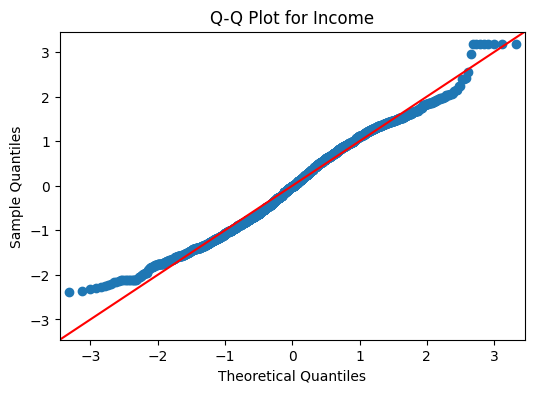

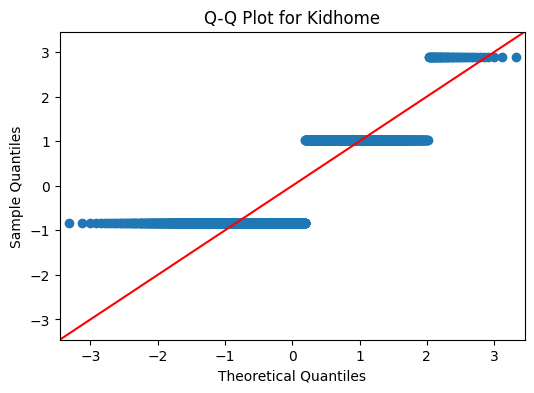

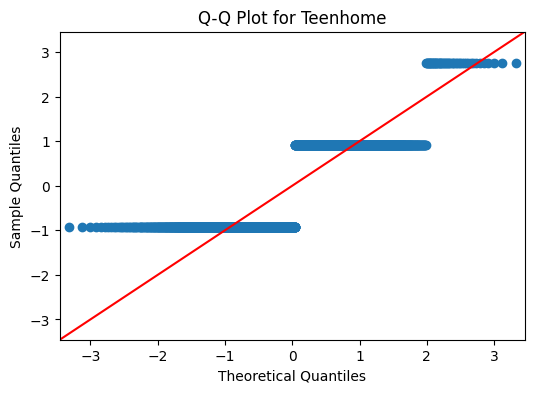

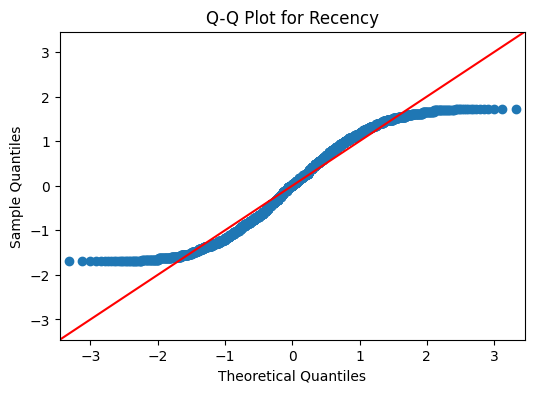

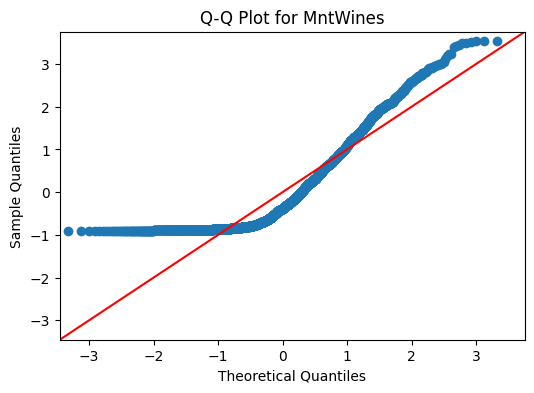

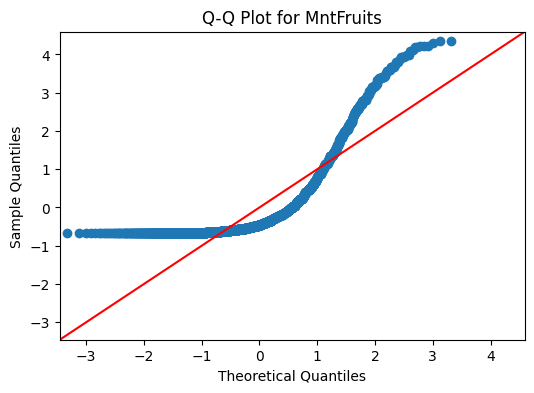

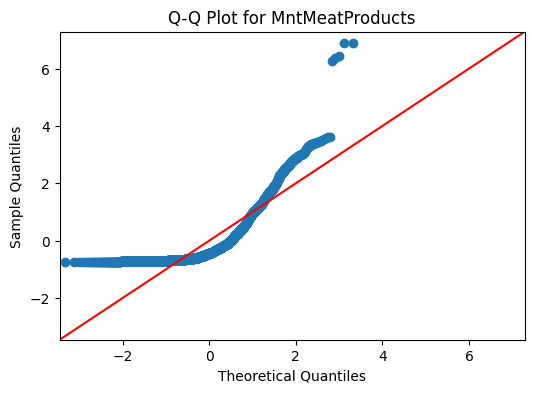

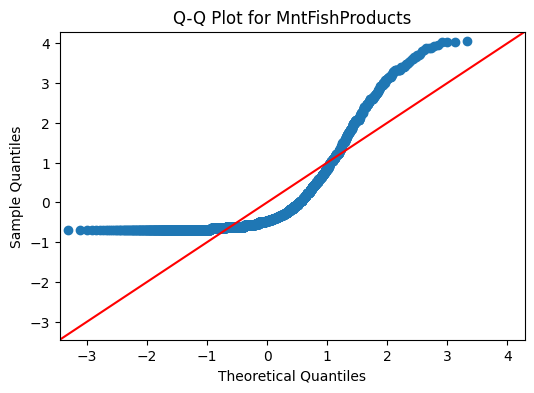

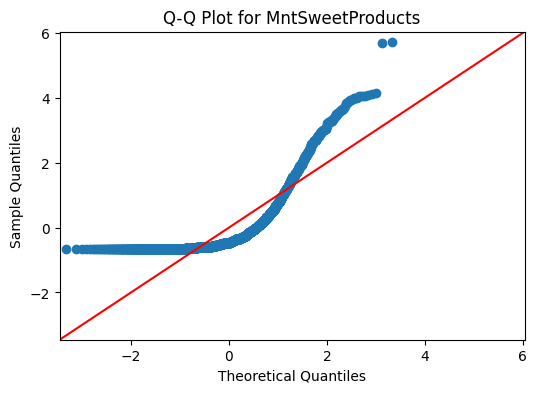

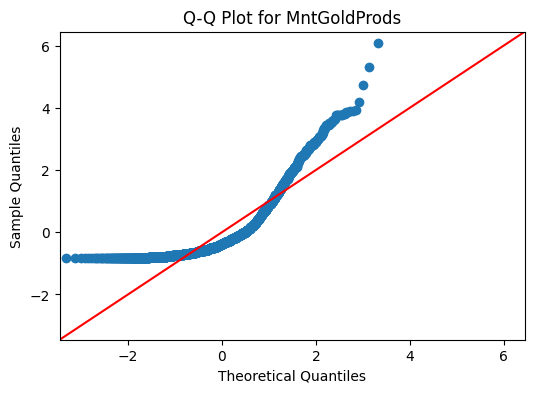

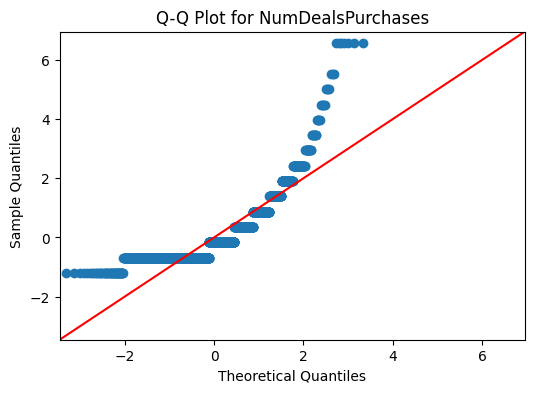

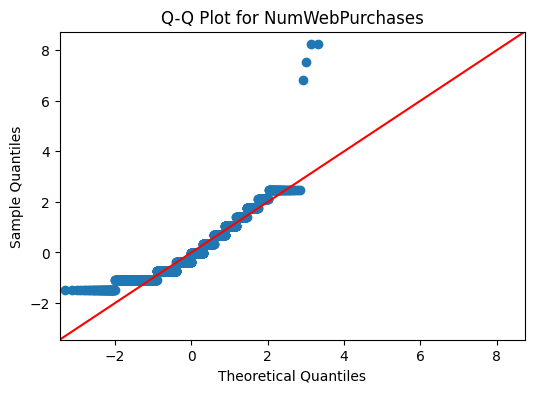

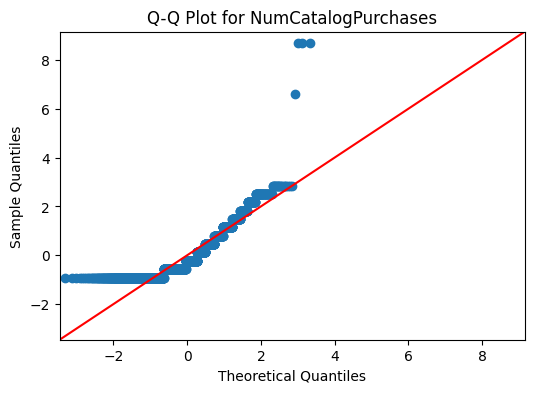

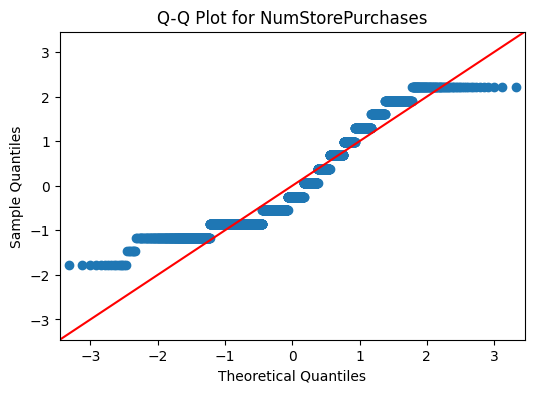

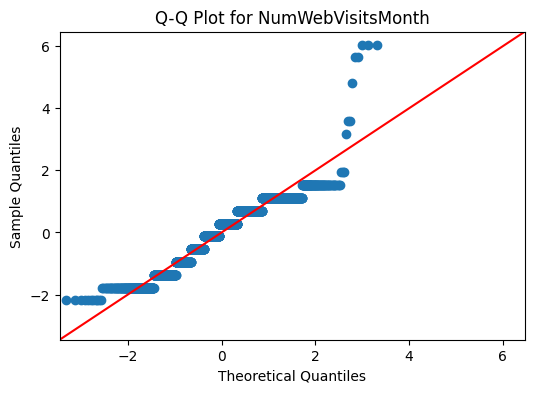

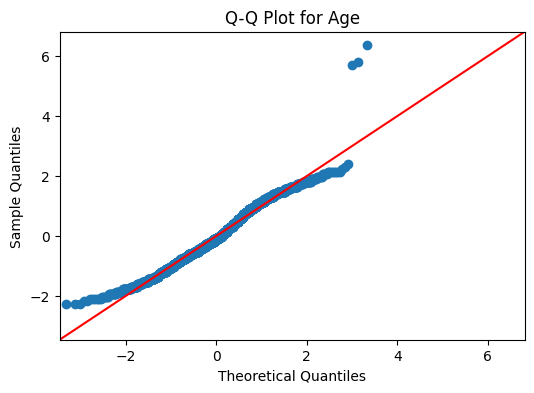

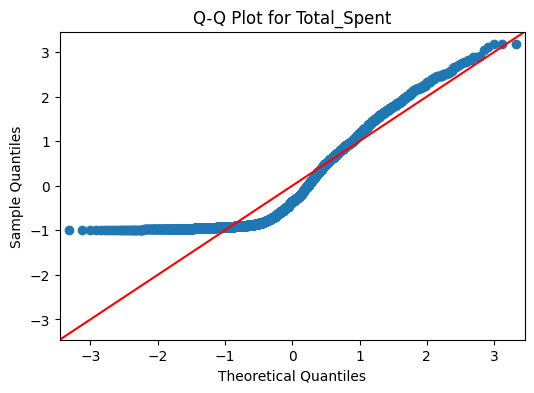

In [ ]:

# Iterate through numerical columns
for col in num_col:
    # Create a Q-Q plot
    fig, ax = plt.subplots(figsize=(6, 4))
    sm.qqplot(df[col], line='45', fit=True, ax=ax)
    ax.set_title(f"Q-Q Plot for {col}")
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()


Observations from Q-Q Plots:(for normal distribution)
 ---

Upon examining Q-Q plots for 'Age' and 'Income', it's evident that these variables closely resemble a normal distribution. Both 'Income' and 'Age' exhibit a pattern aligning well with the expected normal distribution.

However, for other variables in the dataset, the distributions deviate from the normal pattern. To address this, potential transformations such as logarithmic or square root transformations can be explored. These adjustments aim to bring the distributions closer to a normal shape, which is crucial for certain statistical analyses and modeling techniques.

In summary, 'Income' and 'Age' demonstrate approximate normality, while consideration for transformations may enhance normality for other variables in the dataset.



| Variable | Skewness | Kurtosis |
| --- | --- | --- |
| Income | 0.093410 | -0.608254 |
| NumWebVisitsMonth | 0.207926 | 1.821614 |
| Age | 0.349944 | 0.717464 |
| Teenhome | 0.407115 | -0.986235 |
| Kidhome | 0.635288 | -0.779661 |
| NumStorePurchases | 0.702237 | -0.622048 |
| NumWebPurchases | 1.382794 | 5.703128 |
| MntWines | 1.175771 | 0.598744 |
| MntFishProducts | 1.919769 | 3.096461 |
| MntGoldProds | 1.886106 | 3.551709 |
| MntCatalogPurchases | 1.880989 | 8.047437 |
| MntMeatProducts | 2.083233 | 5.516724 |
| MntSweetProducts | 2.136081 | 4.376548 |
| MntFruits | 2.102063 | 4.050976 |
| NumDealsPurchases | 2.418569 | 8.936914 |



### Analysis of Binomial Distribution

In [ ]:
# Display counts of response values
response_counts = df['Response'].value_counts()
print("Response Value Counts:")
print(response_counts)


Response Value Counts:
0    1906
1     334
Name: Response, dtype: int64


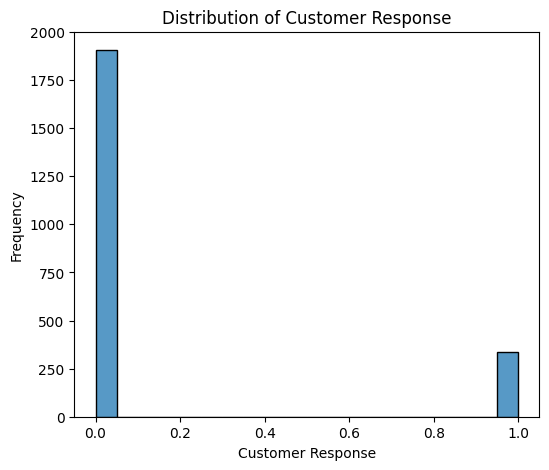

In [ ]:
# Distribution of Customer Response

plt.figure(figsize=(6, 5))
sns.histplot(df['Response'], bins=20)

# Add labels and title
plt.xlabel('Customer Response')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Response')

# Show plot
plt.show()


In [ ]:
# Display counts of 'Complain' values
complain_counts = df['Complain'].value_counts()
print("Complain Value Counts:")
print(complain_counts)


Complain Value Counts:
0    2219
1      21
Name: Complain, dtype: int64


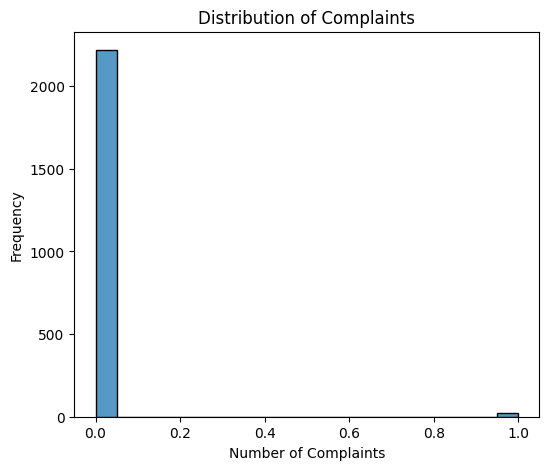

In [ ]:
# Distribution of Complaints

plt.figure(figsize=(6, 5))
sns.histplot(df['Complain'], bins=20)

# Add labels and title
plt.xlabel('Number of Complaints')
plt.ylabel('Frequency')
plt.title('Distribution of Complaints')

# Show plot
plt.show()


### Lognormal distribution check for right skewed data

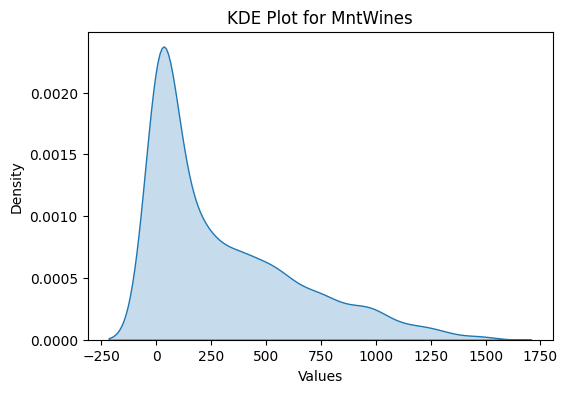

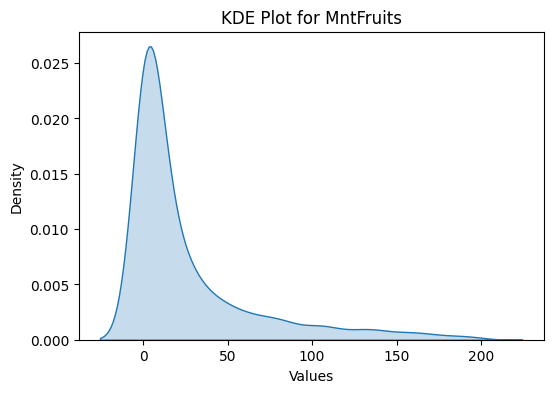

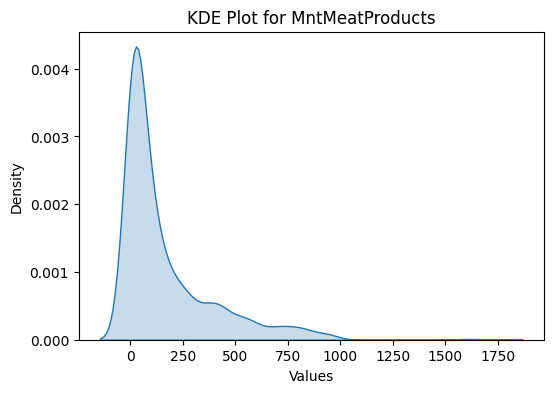

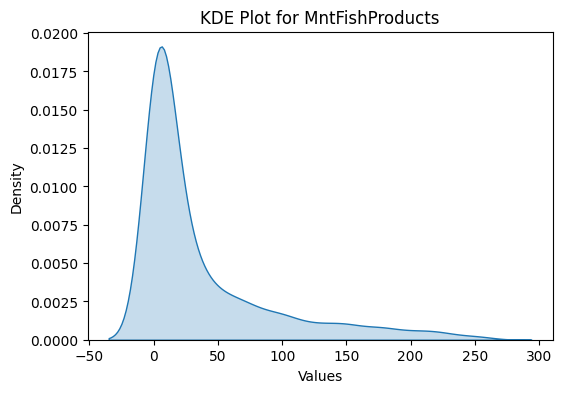

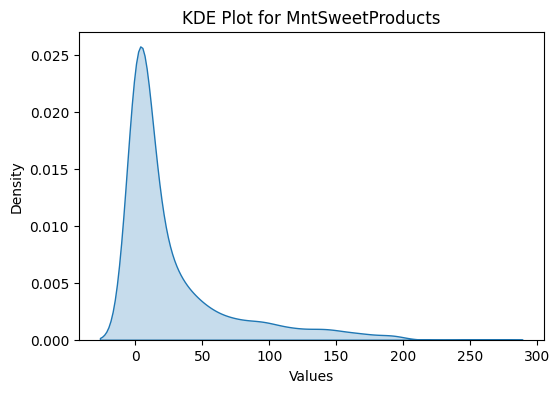

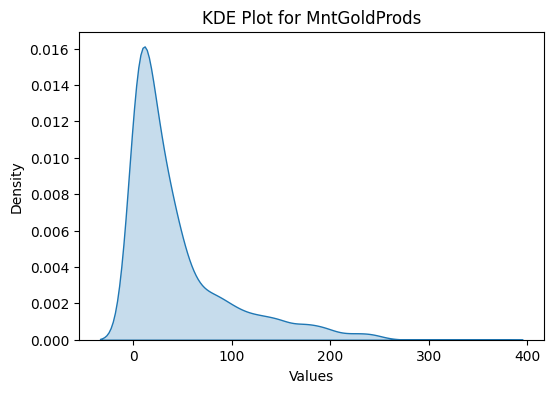

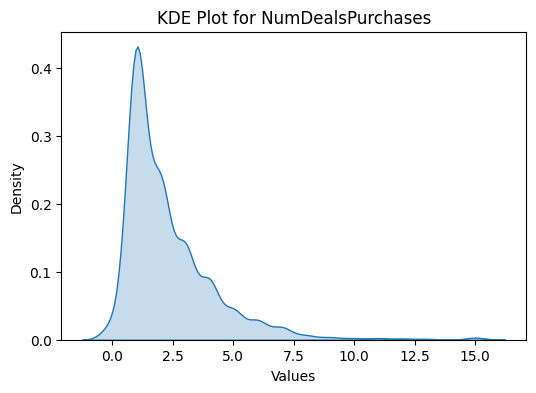

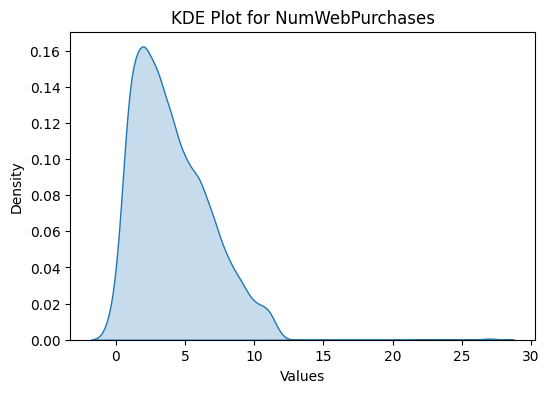

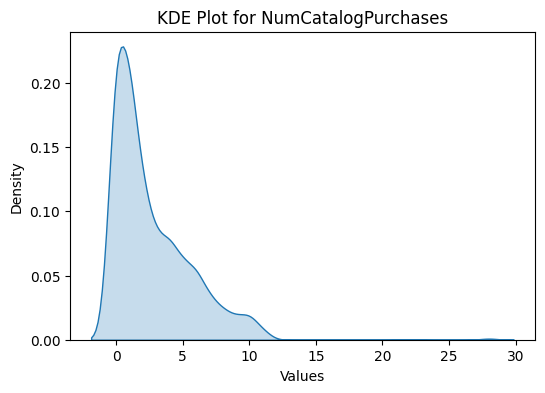

In [ ]:
# Lognormal Distribution Check for Right-Skewed Data

right_skewed_col = []

# Iterate through numerical columns
for col in num_col:
    skewness = df[col].skew()

    # Check if skewness is greater than 1 (indicating right skew)
    if skewness > 1:
        right_skewed_col.append(col)

        # Create KDE plot for right-skewed variable
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.kdeplot(df[col], fill=True)
        ax.set_title(f"KDE Plot for {col}")
        plt.xlabel('Values')
        plt.ylabel('Density')
        plt.show()



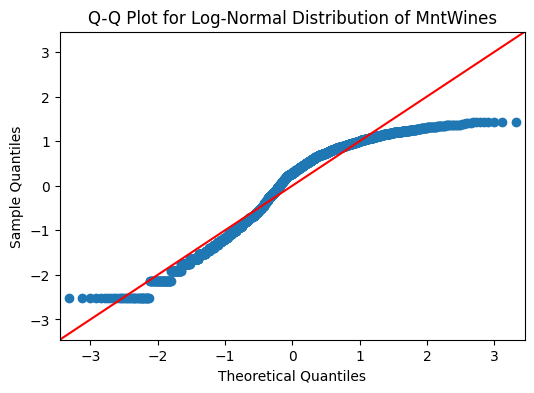

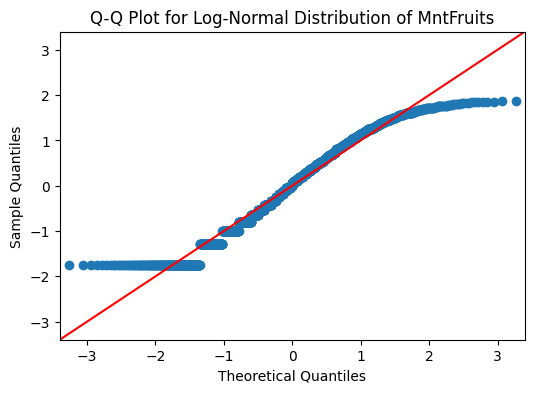

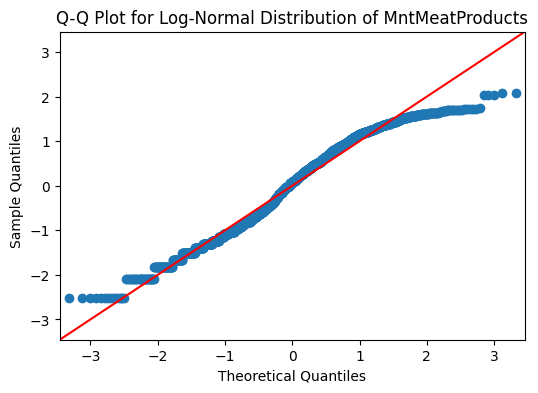

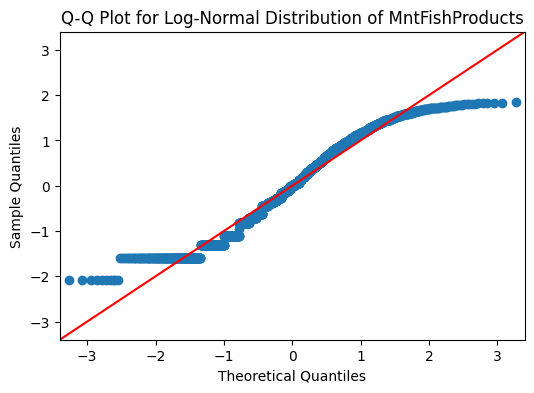

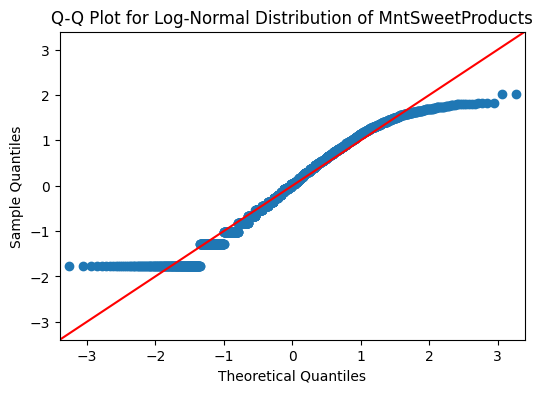

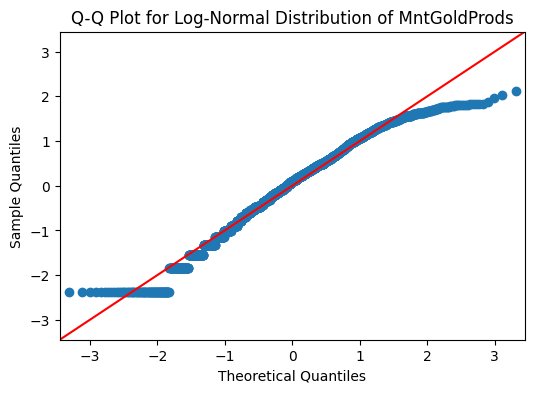

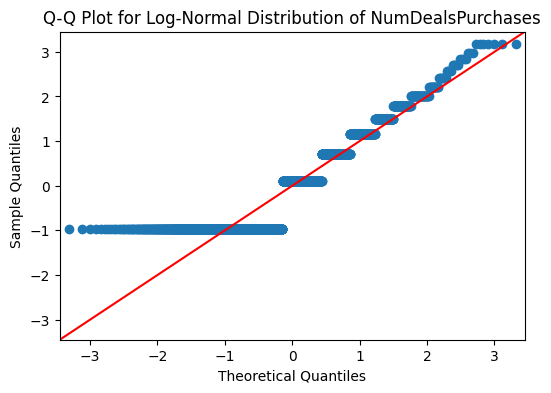

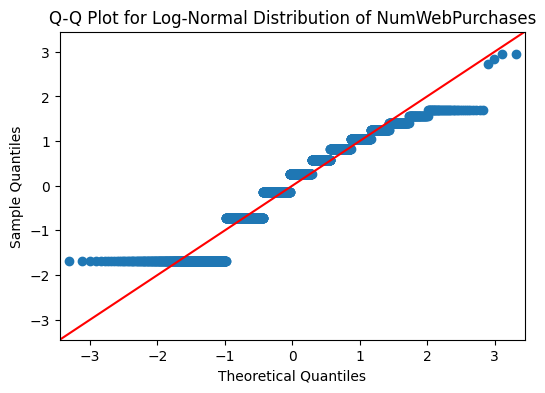

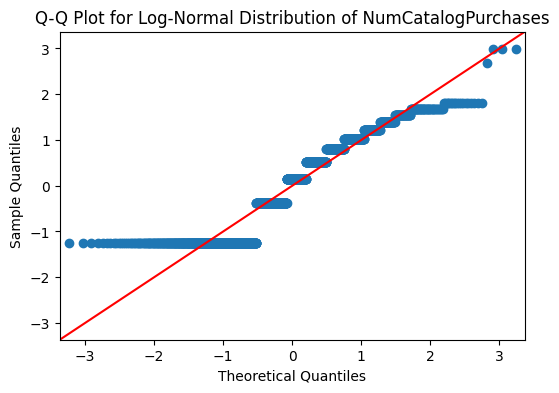

In [ ]:


# Iterate through right-skewed columns
for col in right_skewed_col:
    # Take the natural logarithm of the variable (excluding non-positive values)
    log_variable = np.log(df[df[col] > 0][col])

    # Create Q-Q plot for log-transformed variable
    fig, ax = plt.subplots(figsize=(6, 4))
    sm.qqplot(log_variable, line='45', fit=True, ax=ax)
    ax.set_title(f"Q-Q Plot for Log-Normal Distribution of {col}")
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()


Observations from Q-Q Plot Analysis: ( Log Normal )
---

Upon examining the Q-Q plots for variables related to spending amounts, it is evident that these variables exhibit a distribution pattern that closely resembles a log-normal distribution. However, noticeable deviations from the theoretical quantiles along the 45-degree line indicate the presence of outliers within these variables.

Variables associated with spending amounts commonly follow a log-normal distribution due to the nature of consumer spending behavior. The presence of outliers in these variables highlights potential extreme values that may require further investigation or outlier treatment techniques to ensure robust statistical analysis and modeling.

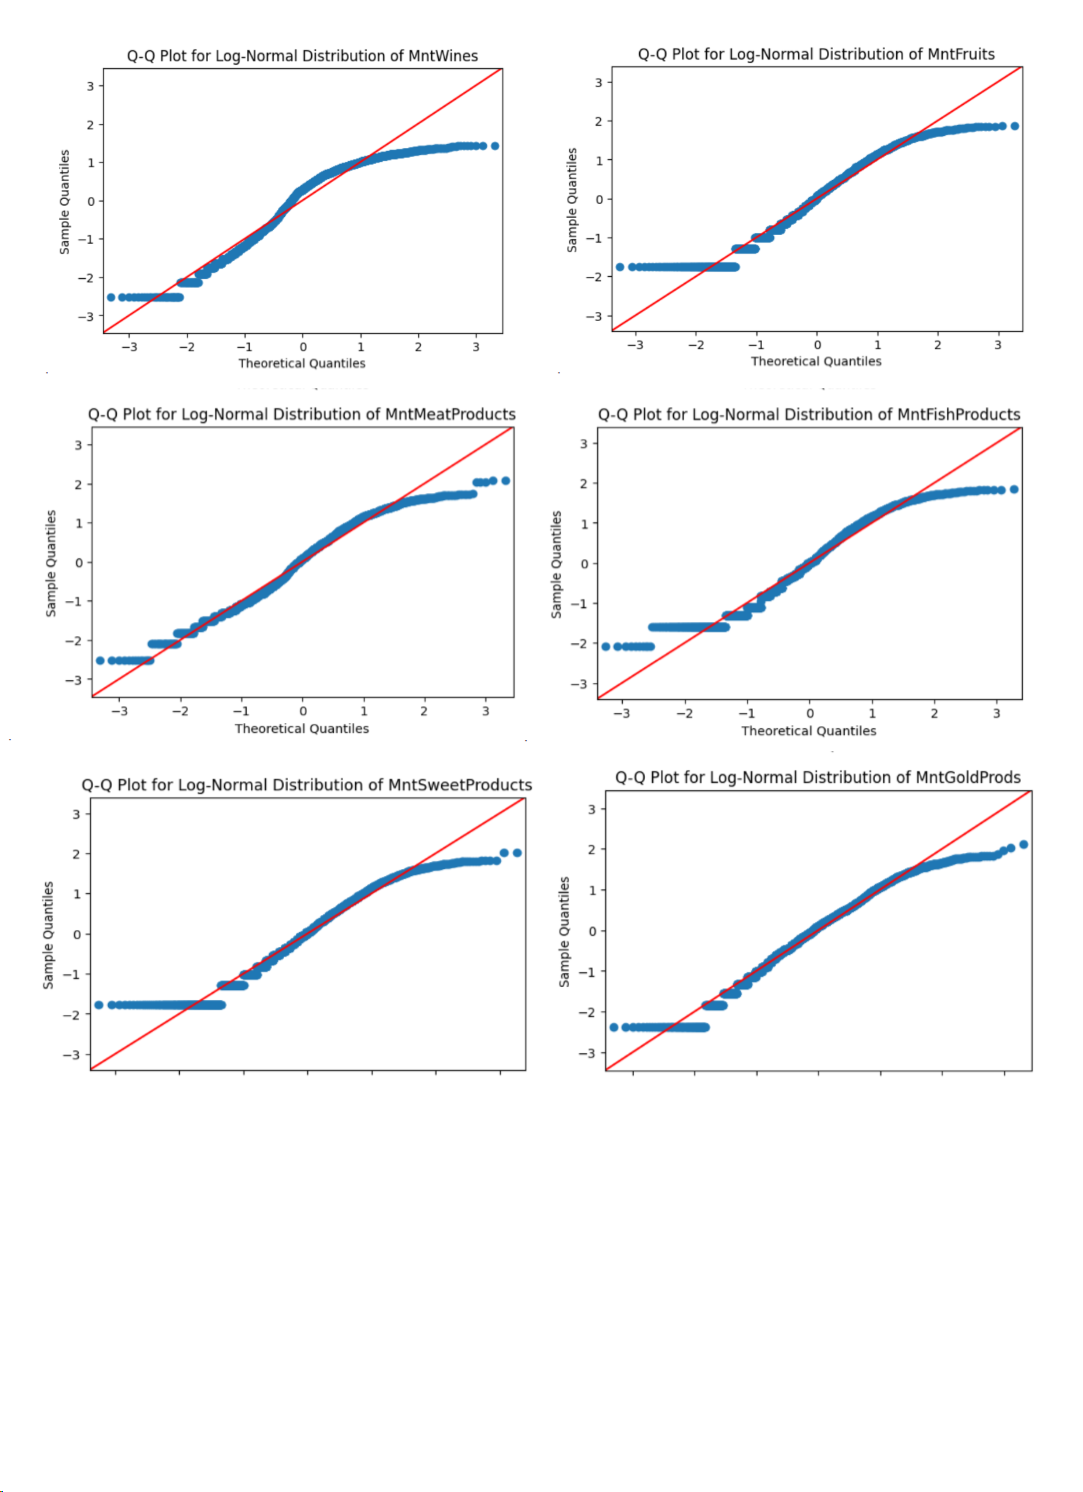

**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

Probability distribution and Expected values
---

#### **Binomially distributed variables**

* Response
* Complains

In [ ]:

# Calculate the total number of responses and complaints
total_responses = len(df['Response'])
total_complaints = len(df['Complain'])

# Calculate the probability of a response and a complaint
prob_response = df[df['Response']==1].shape[0]/len(df['Response'])
prob_complaint = df[df['Complain']==1].shape[0]/len(df['Complain'])

# Calculate the expected number of responses and complaints
expected_responses = total_responses * prob_response
expected_complaints = total_complaints * prob_complaint

print("Expected Number of Responses:", expected_responses)
print("Expected Number of Complaints:", expected_complaints)



Expected Number of Responses: 334.0
Expected Number of Complaints: 21.0


#### **Normally distributed variables**


##### Income

In [ ]:
# Calculate the mean (expected value) for 'Income'
mean_income = df['Income'].mean()

print("Expected Value (Mean) for 'Income':", mean_income)

Expected Value (Mean) for 'Income': 51874.49323104693


In [ ]:
from scipy.stats import norm

# Assuming 'Income' is the column containing income values
income_mean = df['Income'].mean()  # Mean of income
income_std = df['Income'].std()  # Standard deviation of income

# Define intervals for probability calculation
intervals = [(0, 30000), (30000, 50000), (50000, 70000), (70000, np.inf)]

# Calculate probability for each interval
income_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = norm.cdf(upper, loc=income_mean, scale=income_std) - norm.cdf(lower, loc=income_mean, scale=income_std)
    income_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of income in interval {interval}: {income_probabilities[i]:.4f}")


Probability of income in interval (0, 30000): 0.1415
Probability of income in interval (30000, 50000): 0.3162
Probability of income in interval (50000, 70000): 0.3422
Probability of income in interval (70000, inf): 0.1934


##### Age

In [ ]:
# Calculate the mean (expected value) for 'Age'
mean_age = df['Age'].mean()

print("Expected Value (Mean) for 'Age':", mean_age)


Expected Value (Mean) for 'Age': 44.230803571428574


In [ ]:
from scipy.stats import norm

# Assuming 'Age' is the column containing age values
age_mean = df['Age'].mean()  # Mean of age
age_std = df['Age'].std()  # Standard deviation of age

# Define intervals for probability calculation
intervals = [(0, 18), (18, 30), (30, 45), (45, 60), (60, 110)]

# Calculate probability for each interval
age_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = norm.cdf(upper, loc=age_mean, scale=age_std) - norm.cdf(lower, loc=age_mean, scale=age_std)
    age_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of age in interval {interval}: {age_probabilities[i]:.4f}")


Probability of age in interval (0, 18): 0.0145
Probability of age in interval (18, 30): 0.1038
Probability of age in interval (30, 45): 0.4070
Probability of age in interval (45, 60): 0.3795
Probability of age in interval (60, 110): 0.0950


#### **Log Normal / Gamma distributed variables**


- **Expected values of Log Normally distributed variables**
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProds

In [ ]:
import numpy as np
from scipy.stats import gamma

# List of log-normally distributed columns
log_norm_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Dictionary to store the expected values
expected_values = {}

# Calculate the expected value for each log-normally distributed column
for column in log_norm_columns:
    # Filter out non-positive values
    valid_data = df[column][df[column] > 0]  # Changed 'dx' to 'df'
    if not valid_data.empty:
        # Calculate the mean of the natural logarithm for valid data
        mean_log = np.log(valid_data).mean()
        # Exponentiate the mean of the natural logarithm to obtain the expected value
        expected_values[column] = np.exp(mean_log)
    else:
        # Handle case where all values are non-positive
        expected_values[column] = np.nan

# Print the expected values
for column, expected_value in expected_values.items():
    print(f"Expected Value (Mean) for '{column}':", expected_value)


Expected Value (Mean) for 'MntWines': 104.71605877321653
Expected Value (Mean) for 'MntFruits': 13.00600341867881
Expected Value (Mean) for 'MntMeatProducts': 58.98215171772531
Expected Value (Mean) for 'MntFishProducts': 19.111571333728357
Expected Value (Mean) for 'MntSweetProducts': 13.415576287944369
Expected Value (Mean) for 'MntGoldProds': 22.53686302455581


In [ ]:
from scipy.stats import gamma

# Assuming 'MntWines' is the column containing spending on wine values
spent_on_wine_mean = df['MntWines'].mean()  # Mean of spending on wine
spent_on_wine_std = df['MntWines'].std()  # Standard deviation of spending on wine

# Define intervals for probability calculation
intervals = [(0, 100), (100, 500), (500, 1000), (1000, np.inf)]  # Example intervals

# Calculate probability for each interval
spent_on_wine_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = gamma.cdf(upper, a=spent_on_wine_mean**2/spent_on_wine_std**2, scale=spent_on_wine_std**2/spent_on_wine_mean)
    probability -= gamma.cdf(lower, a=spent_on_wine_mean**2/spent_on_wine_std**2, scale=spent_on_wine_std**2/spent_on_wine_mean)
    spent_on_wine_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of spending on wine in interval {interval}: {spent_on_wine_probabilities[i]:.4f}")


Probability of spending on wine in interval (0, 100): 0.3251
Probability of spending on wine in interval (100, 500): 0.4771
Probability of spending on wine in interval (500, 1000): 0.1506
Probability of spending on wine in interval (1000, inf): 0.0471


In [ ]:
import plotly.graph_objects as go

# Create a KDE plot for the 'MntWines' column
fig = go.Figure(data=go.Histogram(x=df['MntWines'], histnorm='probability density', marker_color='rgba(0, 0, 255, 0.7)'))

# Update layout
fig.update_layout(
    title='Hitogram for MntWines',
    xaxis_title='MntWines',
    yaxis_title='Density',
    template='plotly_white'
)

# Show plot
fig.show()


In [ ]:
# Assuming 'MntFruits' is the column containing spending on fruits values
spent_on_fruits = df['MntFruits']

# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(spent_on_fruits)

# Define intervals for probability calculation
intervals = [(0, 100), (100, 500), (500, 1000), (1000, np.inf)]  # Example intervals

# Calculate probability for each interval
spent_on_fruits_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = gamma.cdf(upper, a=shape, loc=loc, scale=scale) - gamma.cdf(lower, a=shape, loc=loc, scale=scale)
    spent_on_fruits_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of spending on fruits in interval {interval}: {spent_on_fruits_probabilities[i]:.4f}")


Probability of spending on fruits in interval (0, 100): 0.9611
Probability of spending on fruits in interval (100, 500): 0.0389
Probability of spending on fruits in interval (500, 1000): 0.0000
Probability of spending on fruits in interval (1000, inf): 0.0000


In [ ]:
# Create a KDE plot for the 'MntWines' column
fig = go.Figure(data=go.Histogram(x=df['MntFishProducts'], histnorm='probability density', marker_color='rgba(0, 0, 255, 0.7)'))

# Update layout
fig.update_layout(
    title='Hitogram for MntWines',
    xaxis_title='MntWines',
    yaxis_title='Density',
    template='plotly_white'
)

# Show plot
fig.show()


In [ ]:
# Assuming 'MntMeatProducts' is the column containing spending on meat values
spent_on_meat = df['MntMeatProducts']

# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(spent_on_meat)

# Define intervals for probability calculation
intervals = [(0, 100), (100, 500), (500, 1000), (1000, np.inf)]  # Example intervals

# Calculate probability for each interval
spent_on_meat_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = gamma.cdf(upper, a=shape, loc=loc, scale=scale) - gamma.cdf(lower, a=shape, loc=loc, scale=scale)
    spent_on_meat_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of spending on meat in interval {interval}: {spent_on_meat_probabilities[i]:.4f}")


Probability of spending on meat in interval (0, 100): 0.5267
Probability of spending on meat in interval (100, 500): 0.3938
Probability of spending on meat in interval (500, 1000): 0.0684
Probability of spending on meat in interval (1000, inf): 0.0111


In [ ]:
# Assuming 'MntMeatProducts' or 'MntFishProducts' is the column containing spending on meat or fish values
spent_on_meat_or_fish = df['MntFishProducts']  # or data['MntFishProducts']

# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(spent_on_meat_or_fish)

# Define intervals for probability calculation
intervals = [(0, 100), (100, 500), (500, 1000), (1000, np.inf)]  # Example intervals

# Calculate probability for each interval
spent_on_meat_or_fish_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = gamma.cdf(upper, a=shape, loc=loc, scale=scale) - gamma.cdf(lower, a=shape, loc=loc, scale=scale)
    spent_on_meat_or_fish_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of spending on meat/fish in interval {interval}: {spent_on_meat_or_fish_probabilities[i]:.4f}")


Probability of spending on meat/fish in interval (0, 100): 0.9507
Probability of spending on meat/fish in interval (100, 500): 0.0493
Probability of spending on meat/fish in interval (500, 1000): 0.0000
Probability of spending on meat/fish in interval (1000, inf): 0.0000


In [ ]:
# Assuming 'MntSweetProducts' is the column containing spending on sweets values
spent_on_sweets = df['MntSweetProducts']

# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(spent_on_sweets)

# Define intervals for probability calculation
intervals = [(0, 100), (100, 500), (500, 1000), (1000, np.inf)]  # Example intervals

# Calculate probability for each interval
spent_on_sweets_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = gamma.cdf(upper, a=shape, loc=loc, scale=scale) - gamma.cdf(lower, a=shape, loc=loc, scale=scale)
    spent_on_sweets_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of spending on sweets in interval {interval}: {spent_on_sweets_probabilities[i]:.4f}")


Probability of spending on sweets in interval (0, 100): 0.9970
Probability of spending on sweets in interval (100, 500): 0.0030
Probability of spending on sweets in interval (500, 1000): 0.0000
Probability of spending on sweets in interval (1000, inf): 0.0000


In [ ]:
# Assuming 'MntGoldProds' is the column containing spending on gold products values
spent_on_gold_products = df['MntGoldProds']

# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(spent_on_gold_products)

# Define intervals for probability calculation
intervals = [(0, 100), (100, 500), (500, 1000), (1000, np.inf)]  # Example intervals

# Calculate probability for each interval
spent_on_gold_products_probabilities = []
for interval in intervals:
    lower, upper = interval
    probability = gamma.cdf(upper, a=shape, loc=loc, scale=scale) - gamma.cdf(lower, a=shape, loc=loc, scale=scale)
    spent_on_gold_products_probabilities.append(probability)

# Print probabilities for each interval
for i, interval in enumerate(intervals):
    print(f"Probability of spending on gold products in interval {interval}: {spent_on_gold_products_probabilities[i]:.4f}")


Probability of spending on gold products in interval (0, 100): 0.8960
Probability of spending on gold products in interval (100, 500): 0.1039
Probability of spending on gold products in interval (500, 1000): 0.0001
Probability of spending on gold products in interval (1000, inf): 0.0000


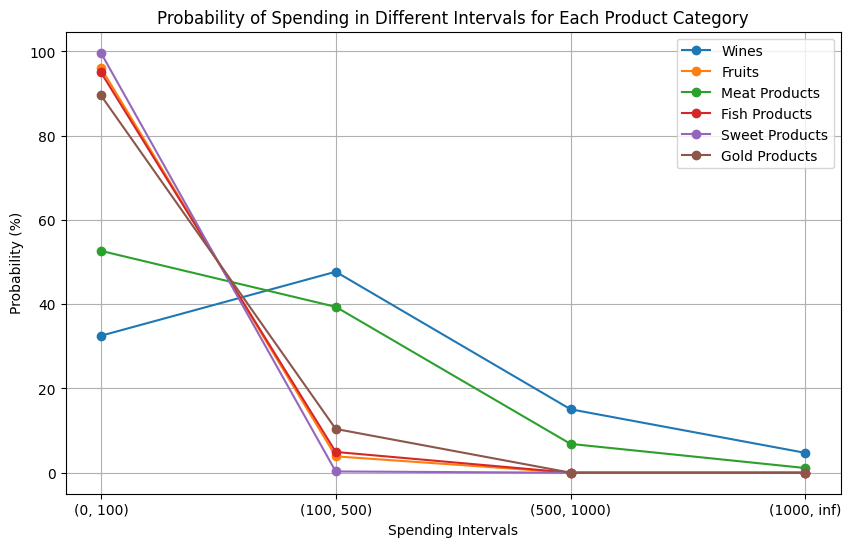

In [ ]:
import matplotlib.pyplot as plt

# Define product categories
product_categories = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']

# Define probabilities for each product category and interval
probabilities = {
    'Wines': [32.51,	47.71,	15.06,	4.71],
    'Fruits': [96.11, 3.89, 0.00, 0.00],
    'Meat Products': [52.67, 39.38, 6.84, 1.11],
    'Fish Products': [95.07, 4.93, 0.00, 0.00],
    'Sweet Products': [99.70, 0.30, 0.00, 0.00],
    'Gold Products': [89.60, 10.39, 0.01, 0.00]
}

# Define intervals
intervals = ['(0, 100)', '(100, 500)', '(500, 1000)', '(1000, inf)']

# Plotting
plt.figure(figsize=(10, 6))

# Plot each product category
for category in product_categories:
    plt.plot(intervals, probabilities[category], label=category, marker='o')

# Adding labels and title
plt.xlabel('Spending Intervals')
plt.ylabel('Probability (%)')
plt.title('Probability of Spending in Different Intervals for Each Product Category')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


The probabilities of spending in different intervals for each product category, expressed as percentages:
---

<br>
<br>

| Product Category   | Interval (0, 100) | Interval (100, 500) | Interval (500, 1000) | Interval (1000, inf) |
|---------------------|-------------------|---------------------|-----------------------|------------------------|
| Wines                   | 32.51%                  | 47.71%                    | 15.06%                        | 4.71%                          |
| Fruits                    | 96.11%                | 3.89%                      | 0.00%                         | 0.00%                          |
| Meat Products      | 52.67%                | 39.38%                    | 6.84%                         | 1.11%                          |
| Fish Products       | 95.07%                | 4.93%                      | 0.00%                         | 0.00%                          |
| Sweet Products     | 99.70%                | 0.30%                      | 0.00%                         | 0.00%                          |
| Gold Products      | 89.60%                | 10.39%                    | 0.01%                         | 0.00%                          |

<br>

#### **Variables that follows *Poissons Distribution***


- **Expected values**


In [ ]:
# List of variables following a Poisson distribution
poisson_variables = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate the expected value (mean) for each variable
expected_values_poisson = df[poisson_variables].mean()

# Print the expected values
for variable, expected_value in expected_values_poisson.items():
    print(f"Expected Value (Mean) for '{variable}': {expected_value}")


Expected Value (Mean) for 'NumDealsPurchases': 2.325
Expected Value (Mean) for 'NumWebPurchases': 4.084821428571429
Expected Value (Mean) for 'NumCatalogPurchases': 2.6620535714285714
Expected Value (Mean) for 'NumStorePurchases': 5.790178571428571
Expected Value (Mean) for 'NumWebVisitsMonth': 5.316517857142857


In [ ]:
from scipy.stats import poisson

# Assuming 'NumWebPurchases' is the column containing the number of web purchases
num_web_purchases = df['NumWebPurchases']

# Estimate lambda (average rate) for the Poisson distribution
lambda_estimate = num_web_purchases.mean()

# Define the number of purchases you want to calculate the probability for
purchase_counts = list(range(12))  # Probabilities for 0 to 11 web purchases

# Calculate probability for each number of purchases
web_purchase_probabilities = poisson.pmf(purchase_counts, lambda_estimate)

# Print probabilities for each count
for count, probability in zip(purchase_counts, web_purchase_probabilities):
    print(f"Probability of {count} web purchases: {probability:.4f}")


Probability of 0 web purchases: 0.0168
Probability of 1 web purchases: 0.0687
Probability of 2 web purchases: 0.1404
Probability of 3 web purchases: 0.1911
Probability of 4 web purchases: 0.1952
Probability of 5 web purchases: 0.1595
Probability of 6 web purchases: 0.1086
Probability of 7 web purchases: 0.0634
Probability of 8 web purchases: 0.0323
Probability of 9 web purchases: 0.0147
Probability of 10 web purchases: 0.0060
Probability of 11 web purchases: 0.0022


In [ ]:
from scipy.stats import poisson

# Extract unique values from the 'NumDealsPurchases' column
num_deals_purchases_unique = sorted(df['NumDealsPurchases'].unique())

# Estimate lambda (average rate) for the Poisson distribution
lambda_estimate = df['NumDealsPurchases'].mean()

# Define the number of purchases you want to calculate the probability for
purchase_counts = list(num_deals_purchases_unique)

# Calculate and print probabilities for 'NumDealsPurchases'
print("Probabilities for NumDealsPurchases:")
purchase_probabilities = poisson.pmf(num_deals_purchases_unique, lambda_estimate)
for count, probability in zip(num_deals_purchases_unique, purchase_probabilities):
    print(f"Probability of {count} NumDealsPurchases: {probability:.4f}")



Probabilities for NumDealsPurchases:
Probability of 0 NumDealsPurchases: 0.0978
Probability of 1 NumDealsPurchases: 0.2273
Probability of 2 NumDealsPurchases: 0.2643
Probability of 3 NumDealsPurchases: 0.2048
Probability of 4 NumDealsPurchases: 0.1191
Probability of 5 NumDealsPurchases: 0.0554
Probability of 6 NumDealsPurchases: 0.0215
Probability of 7 NumDealsPurchases: 0.0071
Probability of 8 NumDealsPurchases: 0.0021
Probability of 9 NumDealsPurchases: 0.0005
Probability of 10 NumDealsPurchases: 0.0001
Probability of 11 NumDealsPurchases: 0.0000
Probability of 12 NumDealsPurchases: 0.0000
Probability of 13 NumDealsPurchases: 0.0000
Probability of 15 NumDealsPurchases: 0.0000


In [ ]:
from scipy.stats import poisson

# Assuming 'NumStorePurchases' is the column containing the number of store purchases per month
num_store_purchases = df['NumStorePurchases']

# Estimate lambda (average rate) for the Poisson distribution
lambda_estimate = num_store_purchases.mean()

# Define the number of purchases you want to calculate the probability for
purchase_counts = list(range(14))  # Probabilities for 0 to 13 store purchases

# Calculate probability for each number of purchases
store_purchase_probabilities = poisson.pmf(purchase_counts, lambda_estimate)

# Print probabilities for each count
for count, probability in zip(purchase_counts, store_purchase_probabilities):
    print(f"Probability of {count} store purchases: {probability:.4f}")


Probability of 0 store purchases: 0.0031
Probability of 1 store purchases: 0.0177
Probability of 2 store purchases: 0.0513
Probability of 3 store purchases: 0.0989
Probability of 4 store purchases: 0.1432
Probability of 5 store purchases: 0.1658
Probability of 6 store purchases: 0.1600
Probability of 7 store purchases: 0.1324
Probability of 8 store purchases: 0.0958
Probability of 9 store purchases: 0.0616
Probability of 10 store purchases: 0.0357
Probability of 11 store purchases: 0.0188
Probability of 12 store purchases: 0.0091
Probability of 13 store purchases: 0.0040


## **Task 4: Insights and Customer Segmentation** 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

### Visualisation

#### **Spending Patterns Across Different Product Categories by Birth Year**

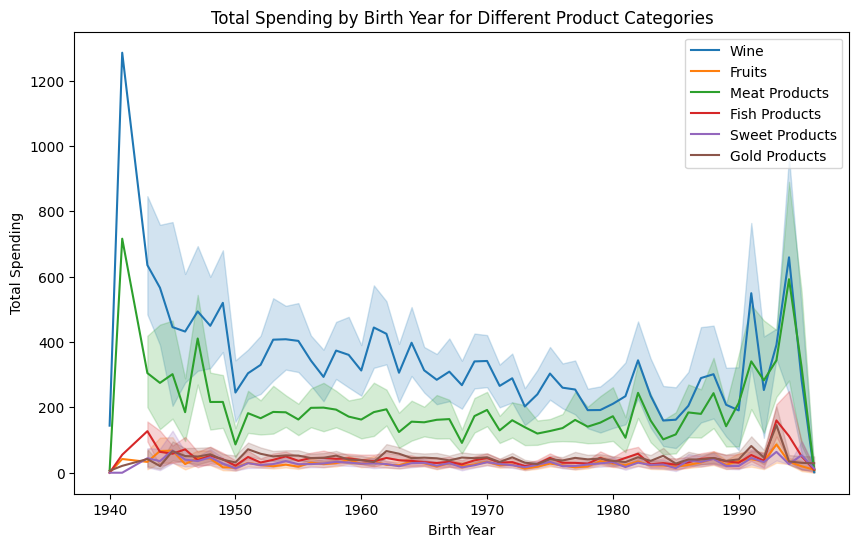

In [ ]:
birth_year_filter = df['Year_Birth'] >= 1940
df_birth_year = df[birth_year_filter]

plt.figure(figsize=(10, 6))

# Total Spending on Wine
sns.lineplot(x=df_birth_year['Year_Birth'], y=df['MntWines'], label='Wine')

# Total Spending on Fruits
sns.lineplot(x=df_birth_year['Year_Birth'], y=df['MntFruits'], label='Fruits')

# Total Spending on Meat Products
sns.lineplot(x=df_birth_year['Year_Birth'], y=df['MntMeatProducts'], label='Meat Products')

# Total Spending on Fish Products
sns.lineplot(x=df_birth_year['Year_Birth'], y=df['MntFishProducts'], label='Fish Products')

# Total Spending on Sweet Products
sns.lineplot(x=df_birth_year['Year_Birth'], y=df['MntSweetProducts'], label='Sweet Products')

# Total Spending on Gold Products
sns.lineplot(x=df_birth_year['Year_Birth'], y=df['MntGoldProds'], label='Gold Products')

plt.xlabel('Birth Year')
plt.ylabel('Total Spending')
plt.title('Total Spending by Birth Year for Different Product Categories')
plt.legend()
plt.show()


#### **Spending Patterns Across Different Product Categories by Age**

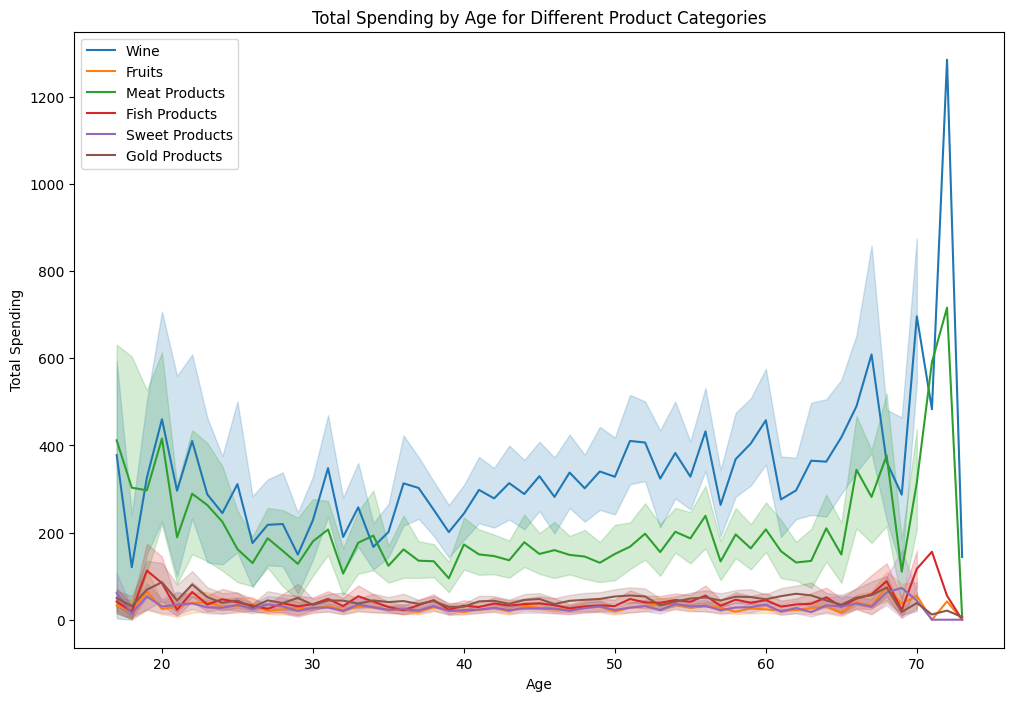

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for birth year >= 1940
df_birth_year = df[df['Year_Birth'] >= 1940]

# Plotting
plt.figure(figsize=(12, 8))

# Line plots for total spending by age group for different product categories
sns.lineplot(x='Age', y='MntWines', data=df_birth_year, label='Wine')
sns.lineplot(x='Age', y='MntFruits', data=df_birth_year, label='Fruits')
sns.lineplot(x='Age', y='MntMeatProducts', data=df_birth_year, label='Meat Products')
sns.lineplot(x='Age', y='MntFishProducts', data=df_birth_year, label='Fish Products')
sns.lineplot(x='Age', y='MntSweetProducts', data=df_birth_year, label='Sweet Products')
sns.lineplot(x='Age', y='MntGoldProds', data=df_birth_year, label='Gold Products')

plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.title('Total Spending by Age for Different Product Categories')
plt.legend()
plt.show()


#### **Total Spending by Education Level**

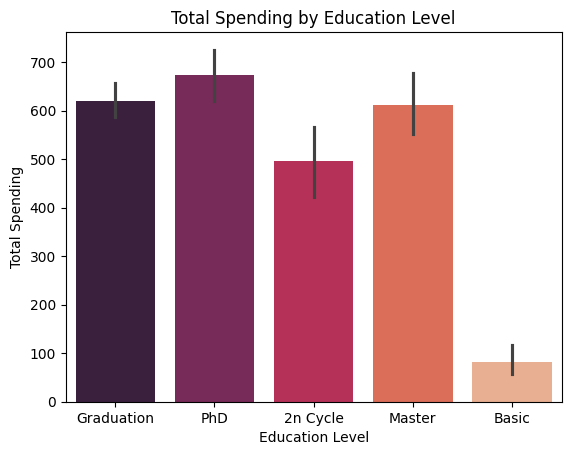

In [ ]:
# Bar plot of Total Spending by Education Level with improved color
sns.barplot(data=df, x='Education', y='Total_Spent', hue='Education', palette='rocket', legend=False)
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.title('Total Spending by Education Level')
plt.show()




#### **Spending on wine by Education Level**

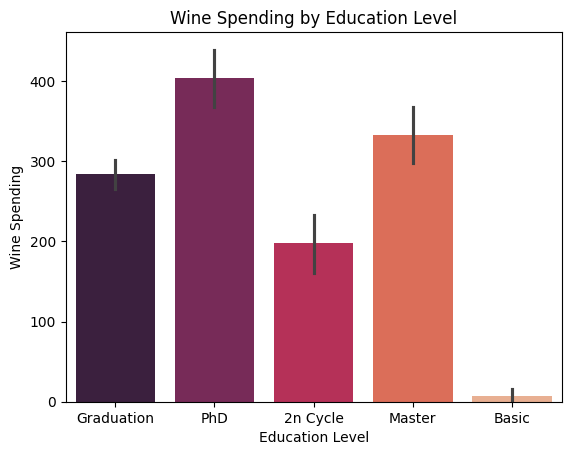

In [115]:
# Bar plot of Wine Spending by Education Level with improved color
sns.barplot(data=df, x='Education', y='MntWines', hue='Education', palette='rocket', legend=False)
plt.xlabel('Education Level')
plt.ylabel('Wine Spending')
plt.title('Wine Spending by Education Level')
plt.show()




From Bar chart, we can observe that individuals with higher levels of education tend to exhibit greater expenditure on wine products. Notably, those with a PhD education level display the highest spending, followed by individuals with a master's degree, undergraduate degree, and those in the second cycle of education. This trend implies a positive correlation between higher educational attainment and increased spending on wines, highlighting the potential influence of education on consumer behavior in this product category.

#### **Average Spending on Different Categories by Marital Status**

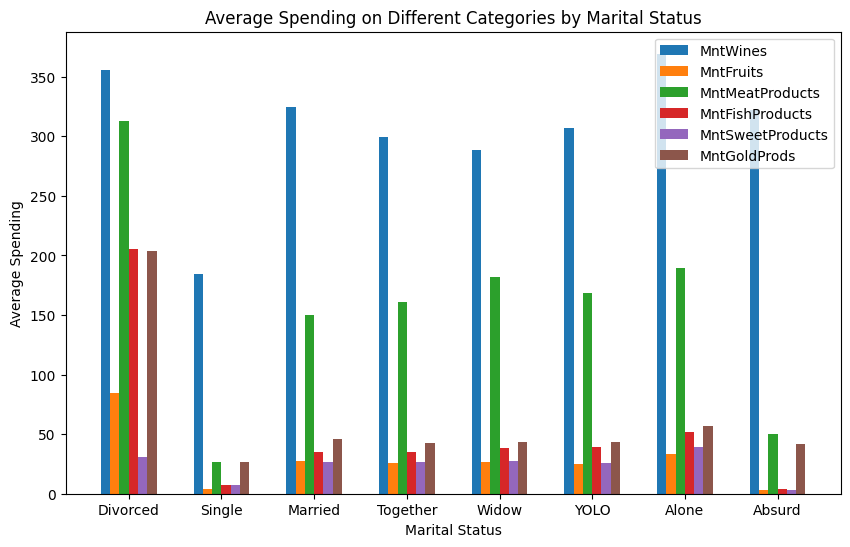

In [116]:
# Convert data to DataFrame
spending_data = df[['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.1
index = np.arange(len(spending_data['Marital_Status'].unique()))  # Generate indices for each marital status

for i, column in enumerate(spending_data.columns[1:]):
    plt.bar(index + i * bar_width, spending_data.groupby('Marital_Status')[column].mean(), bar_width, label=column)

plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.title('Average Spending on Different Categories by Marital Status')
plt.xticks(index + bar_width * (len(spending_data.columns[1:]) - 1) / 2, spending_data['Marital_Status'].unique())  # Center x-ticks
plt.legend()

plt.show()




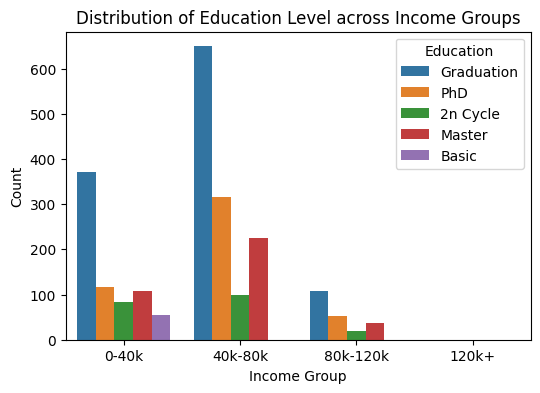

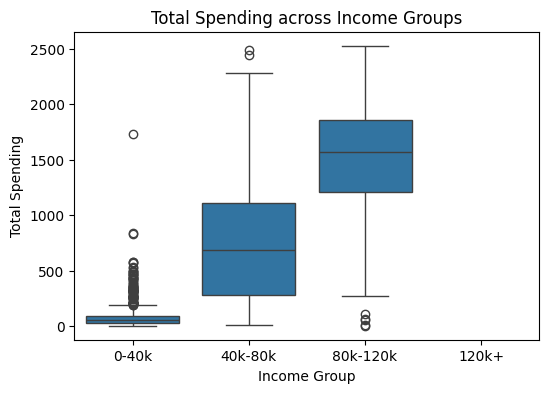

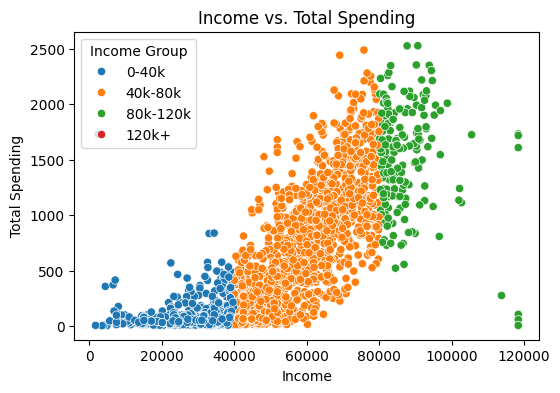

In [117]:
# income bins
income_bins = [0, 40000, 80000, 120000, np.inf]
income_labels = ['0-40k', '40k-80k', '80k-120k', '120k+']

# Segment customers based on income bins
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Visualize distribution across different variables
plt.figure(figsize=(6, 4))
sns.countplot(x='Income_Group', hue='Education', data=df)
plt.title('Distribution of Education Level across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Education')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Income_Group', y='Total_Spent', data=df)
plt.title('Total Spending across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Total Spending')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='Total_Spent', hue='Income_Group', data=df)
plt.title('Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Income Group')
plt.show()


#### **Distribution of different variables across Income Groups**

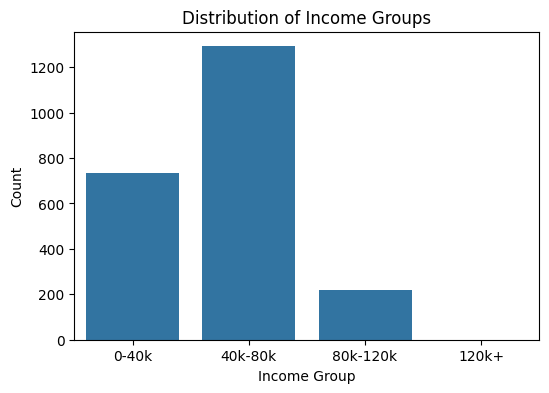

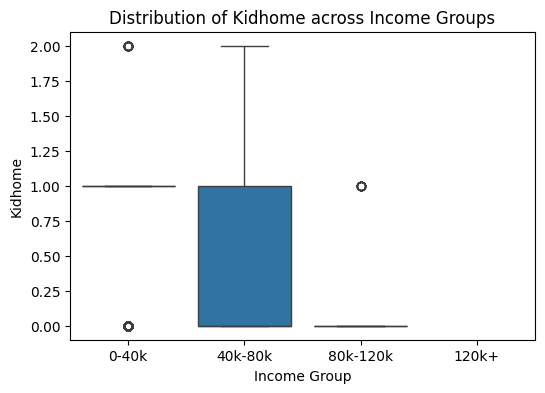

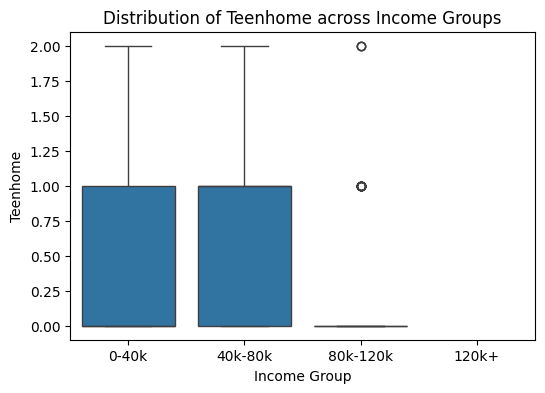

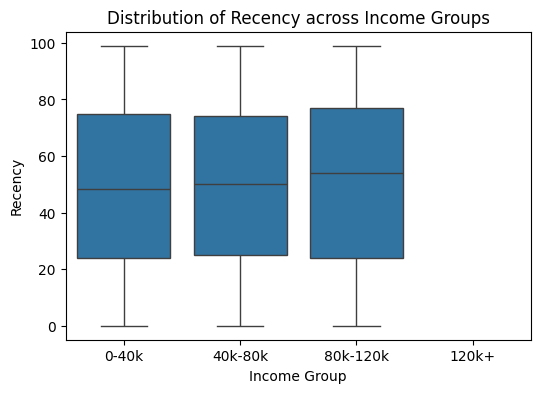

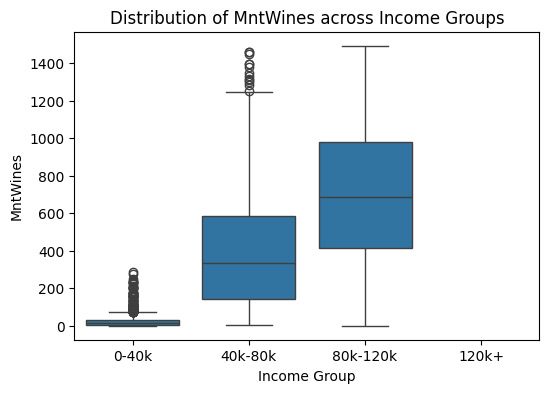

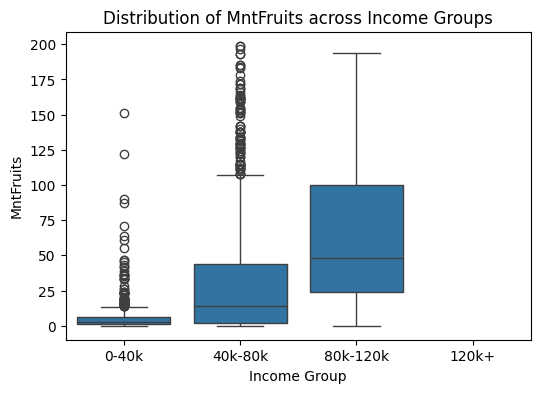

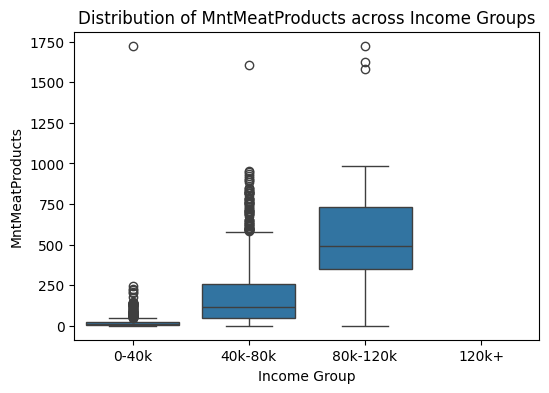

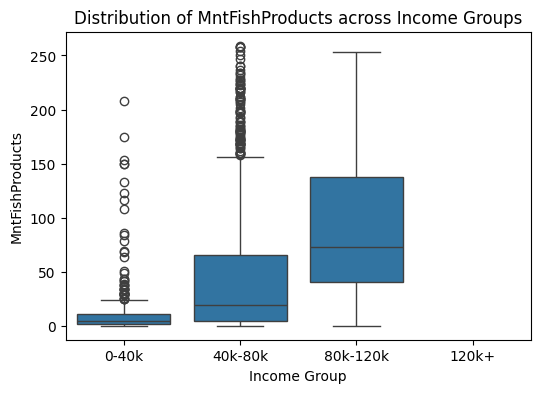

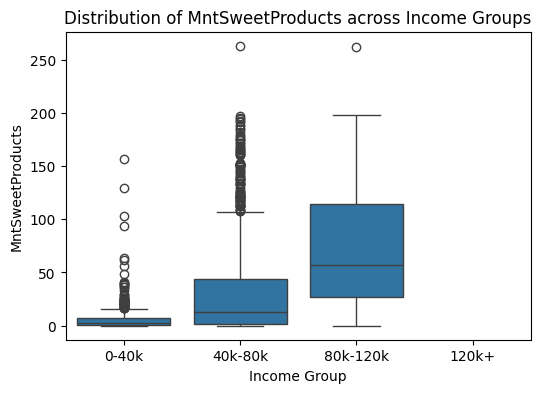

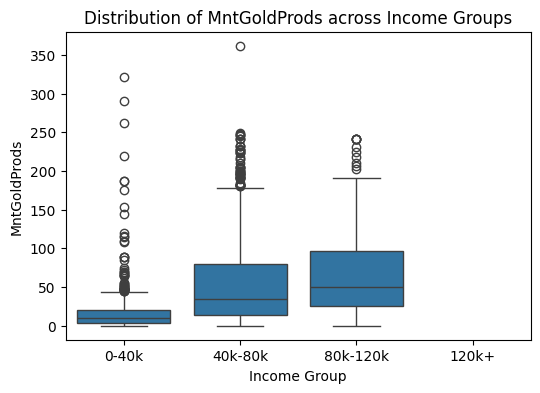

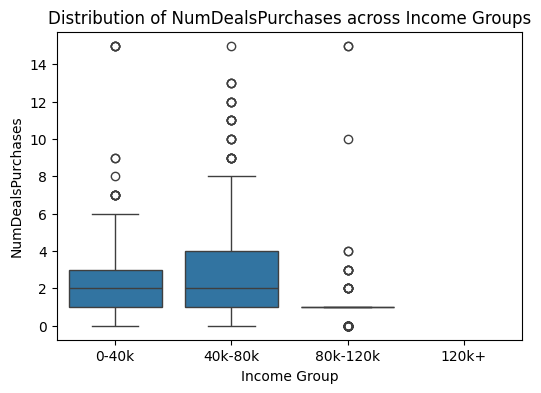

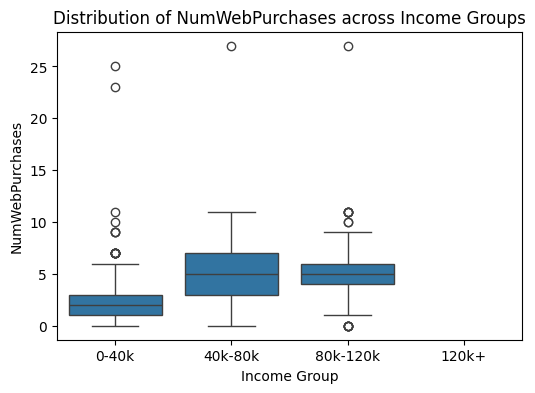

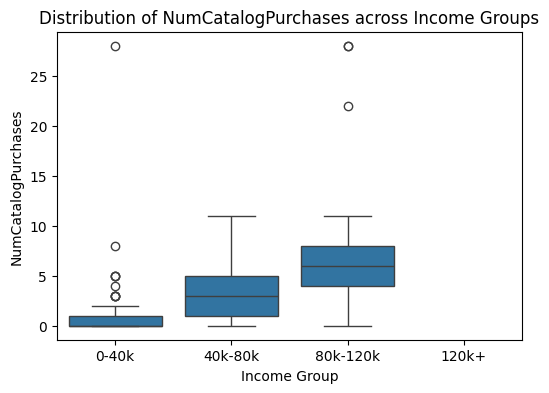

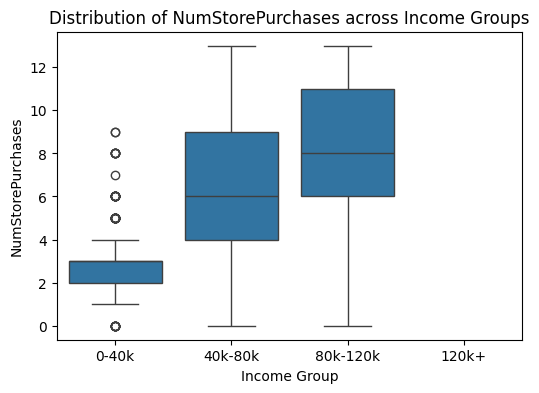

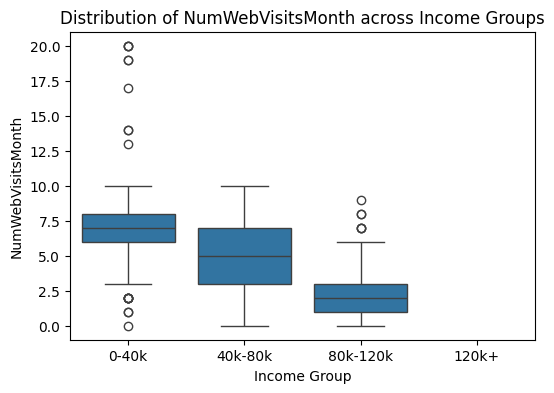

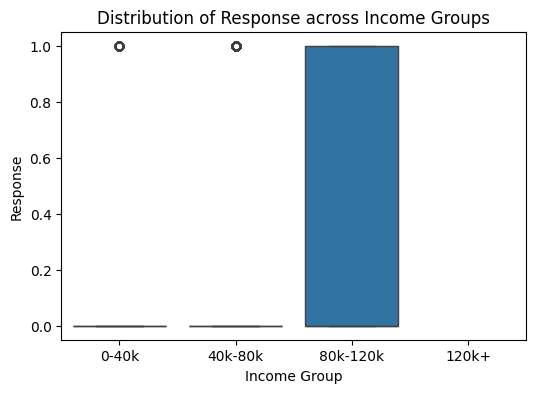

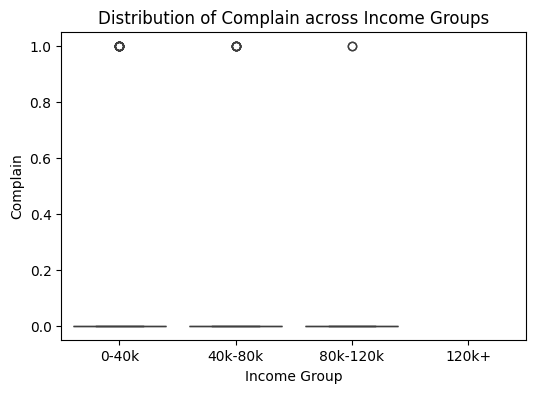

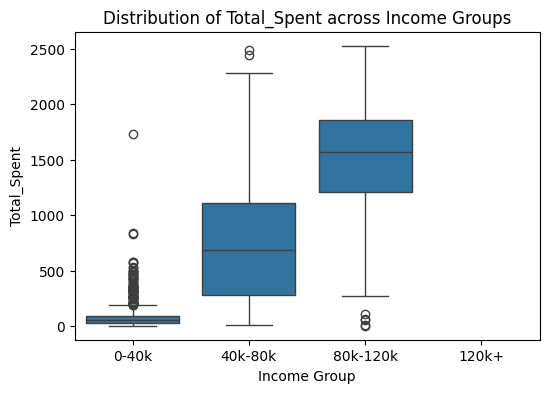

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Segment customers by income using bins
income_bins = [0, 40000, 80000, 120000, np.inf]
income_labels = ['0-40k', '40k-80k', '80k-120k', '120k+']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Visualize the distribution of income groups
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Income_Group')
plt.title('Distribution of Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

# Visualize the distribution across different variables
variables = ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Total_Spent']

for var in variables:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Income_Group', y=var)
    plt.title(f'Distribution of {var} across Income Groups')
    plt.xlabel('Income Group')
    plt.ylabel(var)
    plt.show()


Customer Segmentation
---
Based on customer characteristics and spending habits across different income groups, Here's a possible segmentation :

1. **Segment 1 - Lower Income Group (0-40k)**:
   - Characteristics:
     - Higher presence of households with children (Kidhome).
     - Moderate to low spending across various product categories (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds).
     - Moderate engagement in deals and purchases across different channels (NumCatalogPurchases, NumDealsPurchases, NumStorePurchases, NumWebPurchases).
     - Moderate to low recency of purchases (Recency).
   - Notes:
     - This segment may consist of budget-conscious families with children who prioritize essentials and may engage less in luxury or discretionary spending.

2. **Segment 2 - Middle Income Group (40k-80k)**:
   - Characteristics:
     - Lower presence of households with children (Kidhome).
     - Moderate to high spending across various product categories, particularly in wines, meat products, and gold products.
     - Higher engagement in purchases across different channels.
     - Moderate recency of purchases.
   - Notes:
     - This segment represents middle-income households with relatively higher purchasing power and a more balanced spending pattern across different product categories.

3. **Segment 3 - Higher Income Group (80k-120k)**:
   - Characteristics:
     - Very low presence of households with children.
     - High spending across all product categories, especially in wines, meat products, and gold products.
     - Highest engagement in purchases across different channels.
     - Highest recency of purchases.
   - Notes:
     - This segment likely consists of affluent individuals or households with significant disposable income, allowing for more substantial spending on luxury and high-end products.

Segmentation provides valuable insights for targeted marketing strategies, product recommendations, and customer relationship management. By understanding the distinct characteristics and spending behaviors of different customer segments, businesses can tailor their approaches to effectively meet the needs and preferences of each group.

Based on education levels, we can segment customers into the following groups:

1. **PhD Education Level:**
   - Highest spending on wine, meat, and gold products.
   - Recommendations: Offer premium wine and luxury meat selections to attract this affluent and educated group.

2. **Master's Degree Education Level:**
   - Significant spending on wine, meat, and gold products.
   - Recommendations: Highlight quality wine collections and gourmet meat options to appeal to this segment.

3. **Undergraduate Degree Education Level:**
   - Moderate spending across various categories, focusing on wine and meat products.
   - Recommendations: Provide diverse wine options and quality meat selections to capture their interest.

4. **Second Cycle of Education Level:**
   - Lower spending compared to other groups, with a focus on wine and meat products.
   - Recommendations: Offer budget-friendly wine selections and meat assortments to incentivize purchases.

Segmenting customers based on education levels allows for targeted marketing.

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## **Task 5: Conclusion and Recommendations**

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

#### **Avg Spending by Product Category**

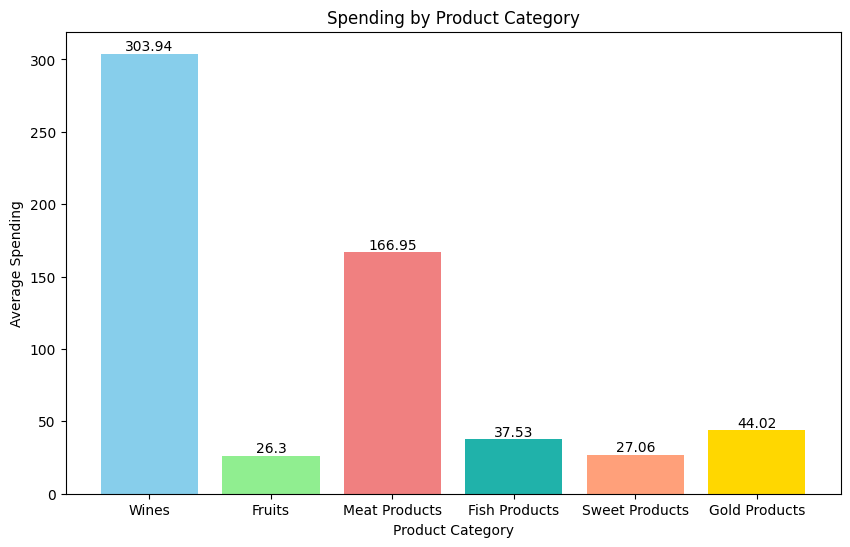

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
data = {
    "Product Category": ["Wines", "Fruits", "Meat Products", "Fish Products", "Sweet Products", "Gold Products"],
    "Average Spending": [df['MntWines'].mean(), df['MntFruits'].mean(), df['MntMeatProducts'].mean(), df['MntFishProducts'].mean(), df['MntSweetProducts'].mean(), df['MntGoldProds'].mean()]
}

# Define custom color palette
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightseagreen', 'lightsalmon', 'gold']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(data['Product Category'], data['Average Spending'], color=colors)

# Add labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.xlabel("Product Category")
plt.ylabel("Average Spending")
plt.title("Spending by Product Category")
plt.show()


#### **Scatter Plot of Income vs. Total Spent**

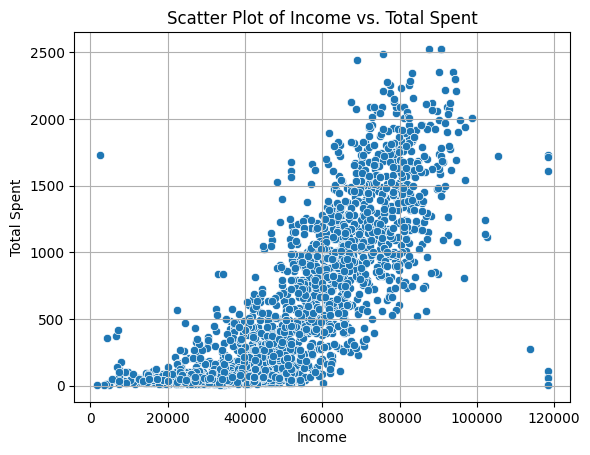

In [ ]:
# Scatter Plot of Income vs. Total Spent

sns.scatterplot(data=df, x='Income', y='Total_Spent')
plt.title('Scatter Plot of Income vs. Total Spent')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.grid()
plt.show()


#### **Scatter Plot of Income vs. Wine Spent**

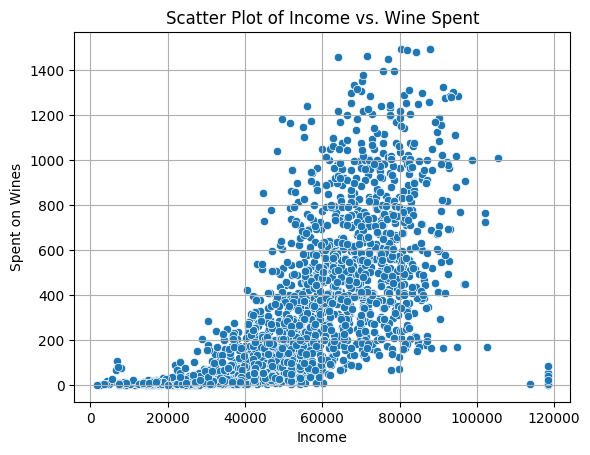

In [ ]:
# Scatter Plot of Income vs. Wine Spent
sns.scatterplot(data=df, x='Income', y='MntWines')
plt.title('Scatter Plot of Income vs. Wine Spent')
plt.xlabel('Income')
plt.ylabel('Spent on Wines')
plt.grid()
plt.show()


#### **Income vs MntFishProducts**

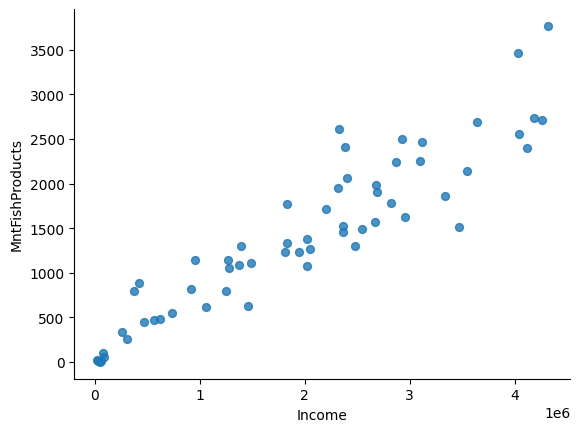

In [141]:
#  Income vs MntFishProducts

from matplotlib import pyplot as plt
pivot_table.plot(kind='scatter', x='Income', y='MntFishProducts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### **Correlation Heatmap**

<ipython-input-362-4c9231b91887>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dx.corr()


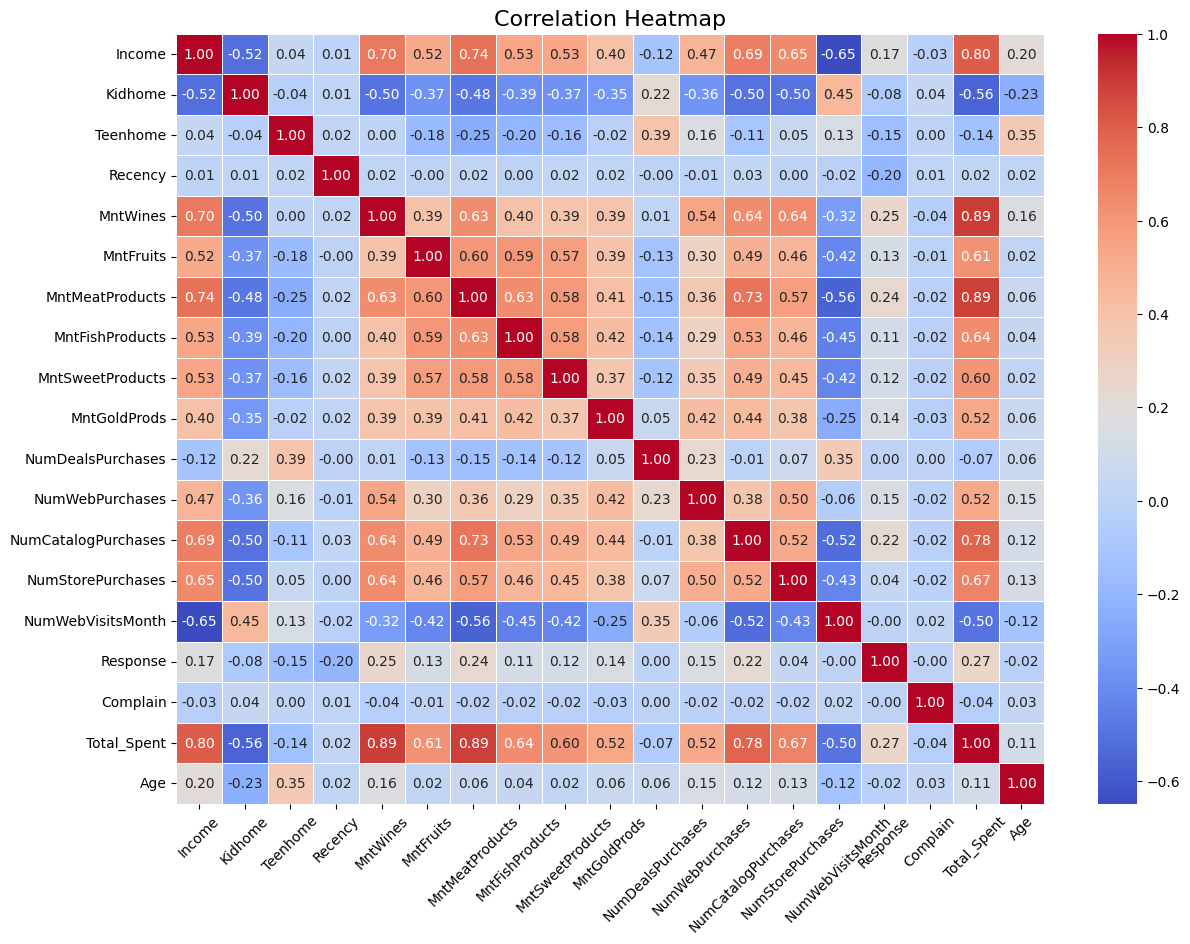

In [ ]:

correlation_matrix = dx.corr()

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



#### **Total Spending Across Product Categories by Age Group**

In [129]:
df['Age_Group'].value_counts()

Middle-aged Adults    1094
Adults                 799
Seniors                232
Young Adults           115
Name: Age_Group, dtype: int64

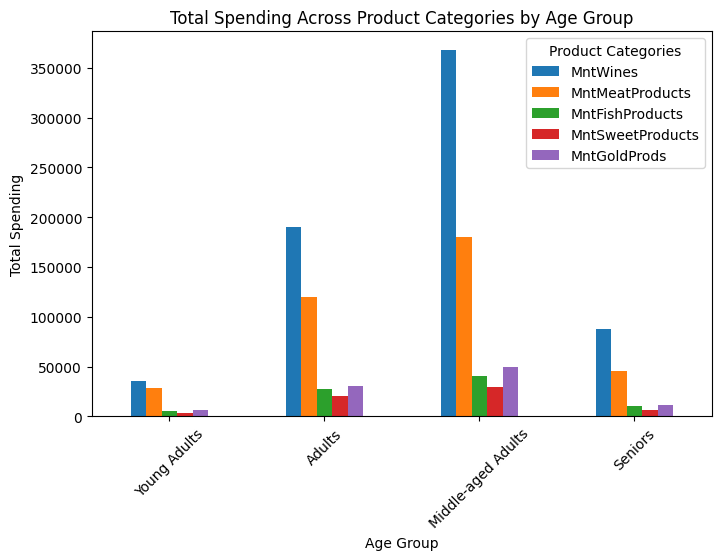

In [131]:

# Categorize age groups based on specific age thresholds
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, float('inf')],
                         labels=['Young Adults', 'Adults', 'Middle-aged Adults', 'Seniors'])

# Calculate total spending across different product categories for each age group
age_group_spending = df.groupby('Age_Group')[['MntWines', 'MntMeatProducts', 'MntFishProducts',
                                              'MntSweetProducts', 'MntGoldProds']].sum()

# Visualize the total spending across different product categories for each age group
age_group_spending.plot(kind='bar', figsize=(8, 5))
plt.title('Total Spending Across Product Categories by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.legend(title='Product Categories')
plt.show()


#### **Correlation Heatmap and Pair plot of High Correlation Variables**

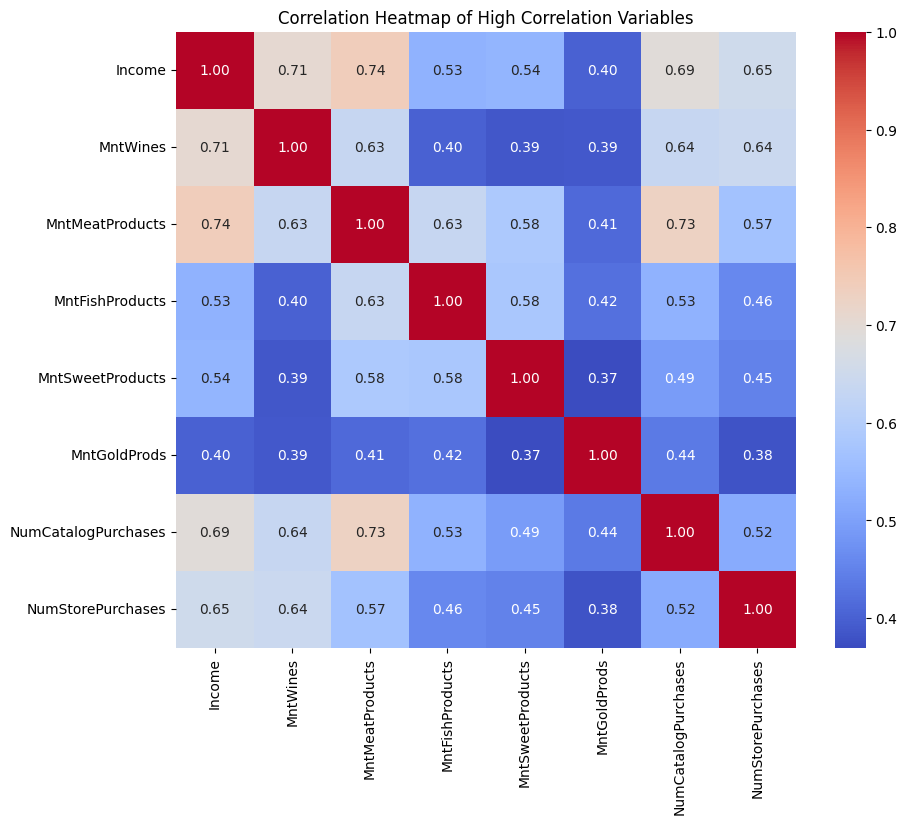

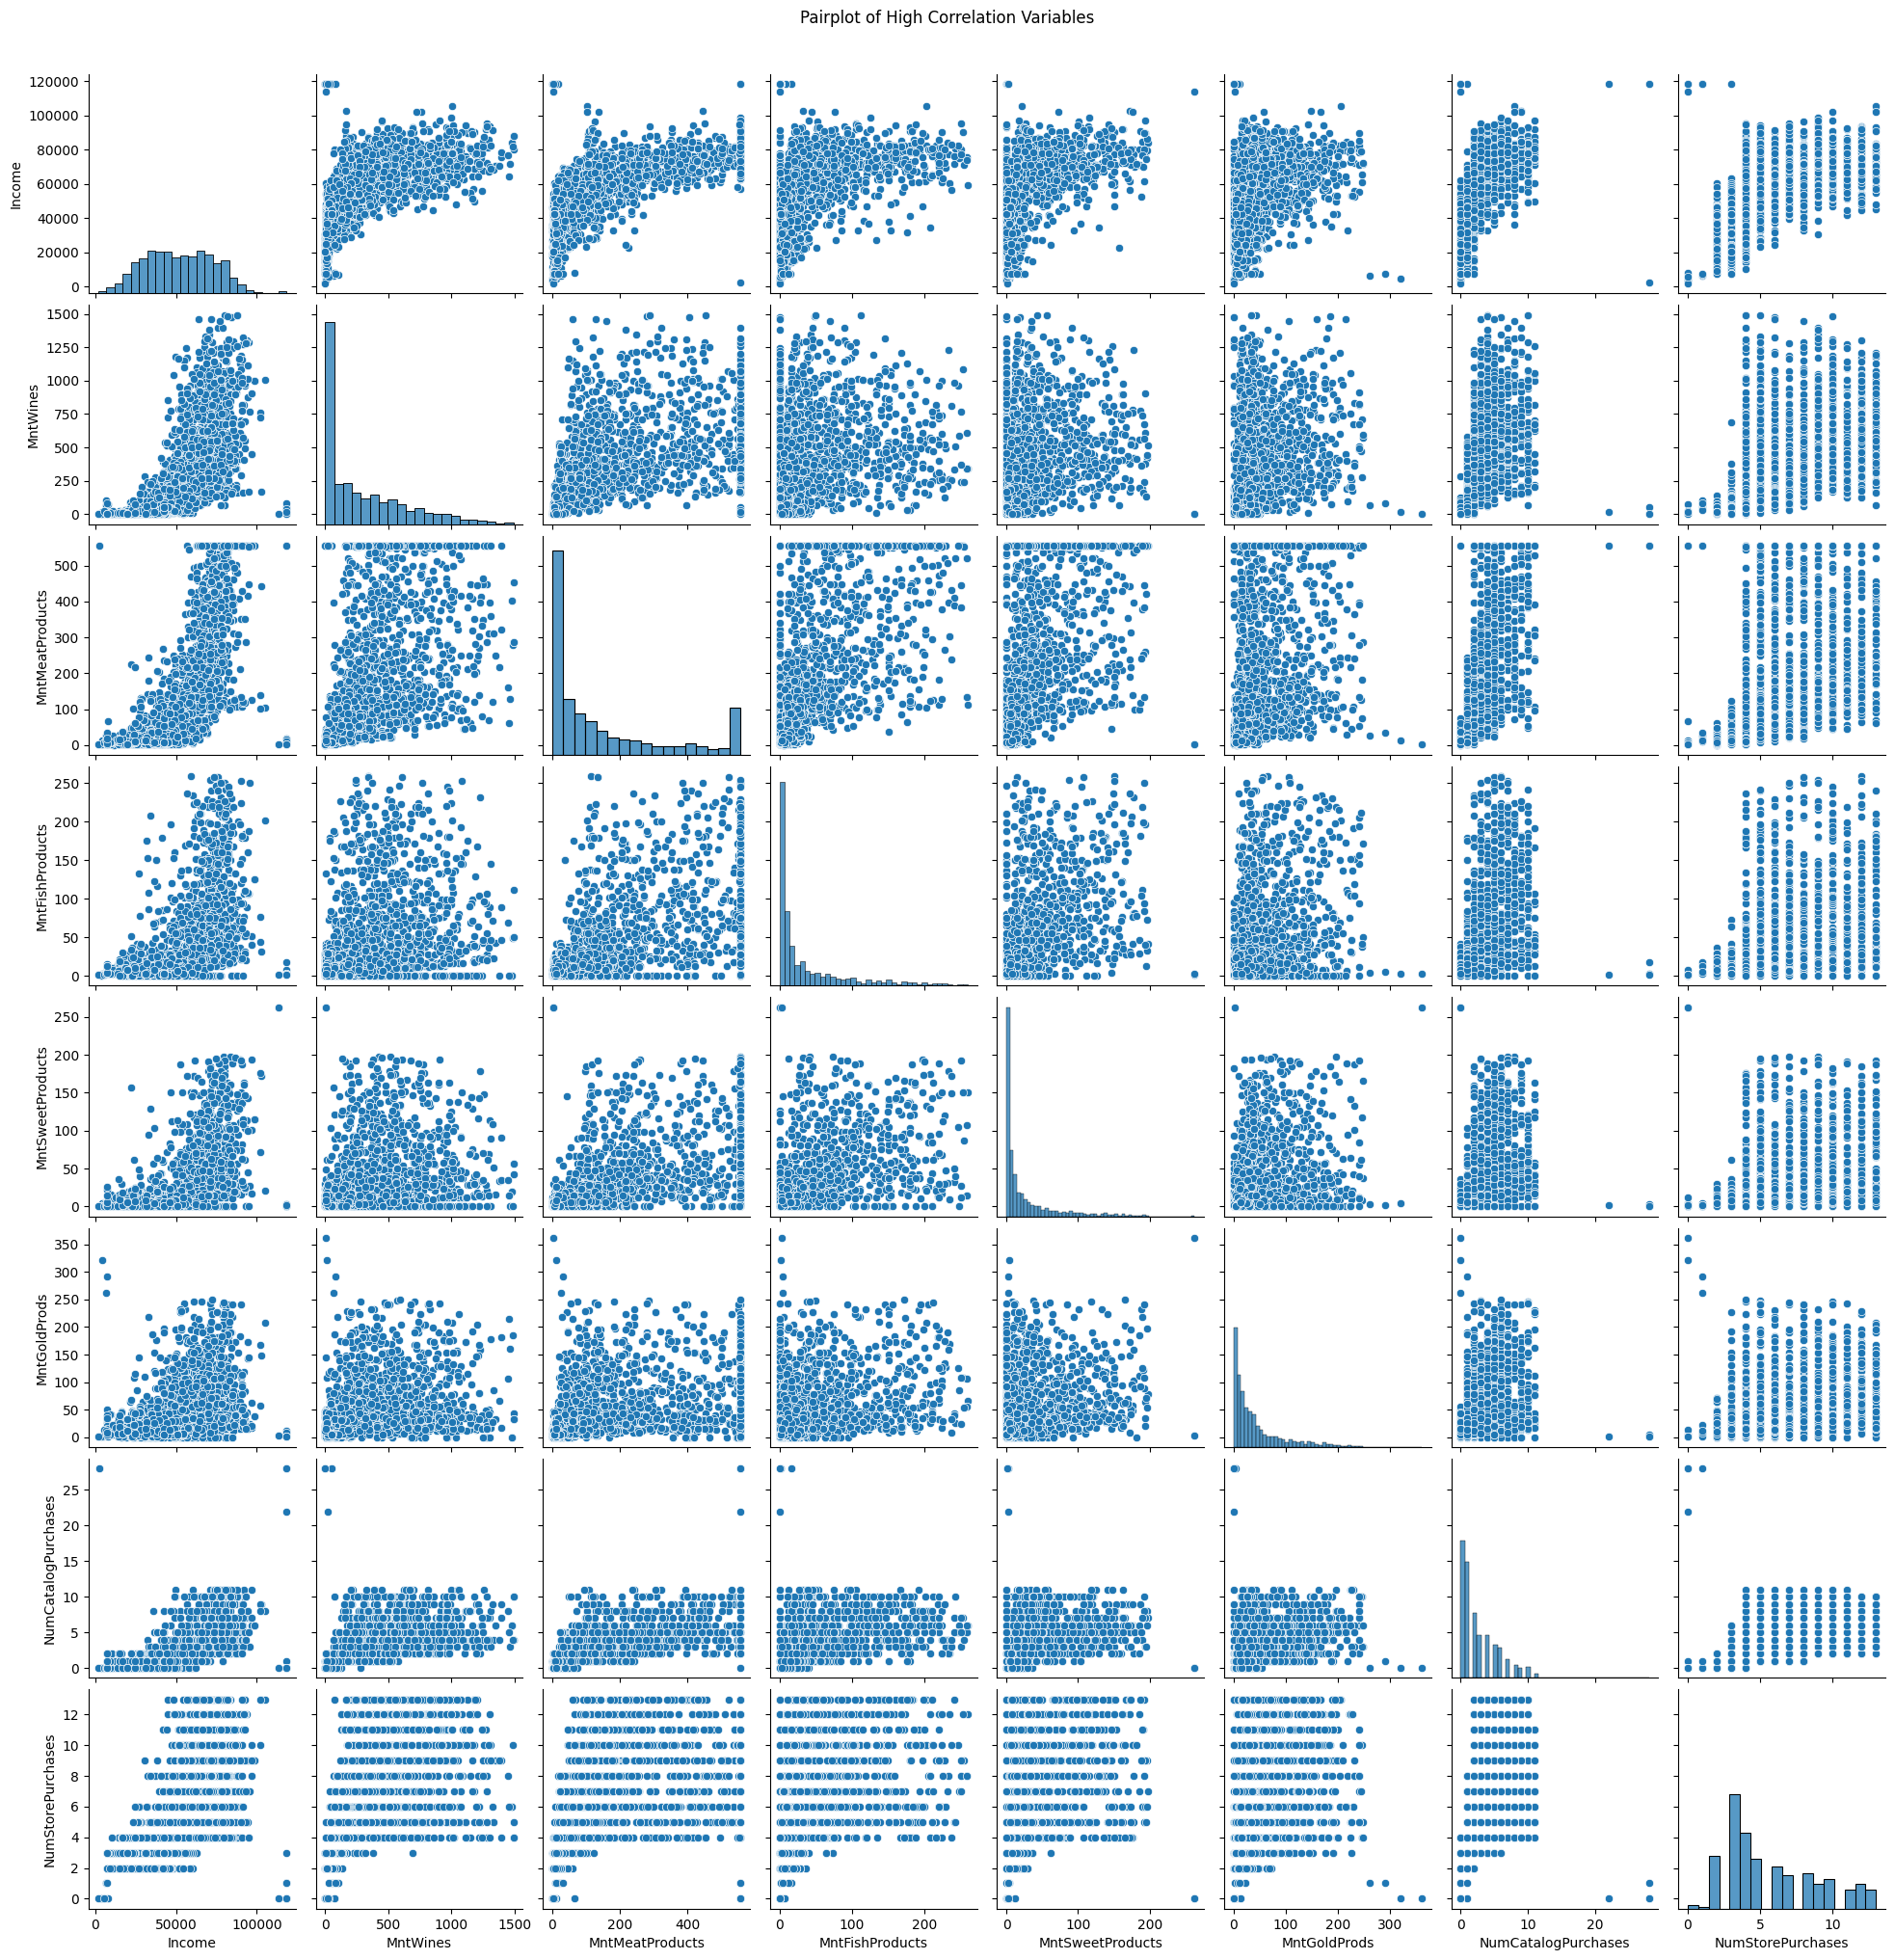

In [ ]:
# Define variables with high correlation
high_corr_vars = ['Income', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'NumStorePurchases']

# Create a heatmap of correlation matrix for high correlation variables
high_corr_df = df[high_corr_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of High Correlation Variables')
plt.show()

# Create scatterplot matrix for high correlation variables
sns.pairplot(df[high_corr_vars])
plt.suptitle('Pairplot of High Correlation Variables', y=1.02)
plt.show()


Conclusion and Recommendations
---

**Insights and Conclusions:**

After thoroughly analyzing the data, I've uncovered some valuable insights:

1. **Understanding Customer Spending:**
   - People with higher education levels, especially those with a PhD, tend to spend more on wine products, indicating a positive link between education and wine spending.
   - The highest spending is on wine, followed by meat products, suggesting specific preferences among customers.
   - Customers with higher incomes, particularly those earning between 80k-120k, tend to spend more across various product categories.

2. **Segmentation Findings:**
   - We can segment customers based on their income into three main groups:
     - Lower Income Group (0-40k): They generally spend moderately across different product categories.
     - Middle Income Group (40k-80k): These customers show moderate to high spending, especially on wines and meat products.
     - Higher Income Group (80k-120k): They exhibit high spending across all categories, particularly on wines, meat, and gold products.

3. **Correlation and Probability Insights:**
   - There's a strong correlation between income and spending across all product categories, indicating that higher-income individuals tend to spend more.
   - Moderate positive correlations exist between different product categories, suggesting certain preferences or complementary buying behaviors among customers.
   - Probability calculations help us understand customer spending behaviors within specific intervals, providing valuable insights into their purchasing patterns.

4. **Customer Response and Complaints:**
   - Customers in the 80k-120k income group show a higher response rate, indicating their active engagement with marketing offers and campaigns.

5. **Outlier Detection and Handling:**
   - I've identified and addressed outliers using techniques like Winsorization to ensure data integrity and accurate analysis.

6. **Descriptive Statistics:**
   - Descriptive statistics offer insights into the mean and standard deviation of various numerical columns, giving us a clear picture of data distribution and variability.



**Recommendations:**

Based on these insights, here are some recommendations for the company:

1. **Targeted Marketing Strategies:**
   - Develop targeted marketing campaigns tailored to different income segments and spending behaviors.
   - Focus marketing efforts on high-spending customers, especially in wine, meat, and gold product categories.

2. **Customer Engagement:**
   - Engage customers with higher incomes, particularly those earning between 80k-120k, through personalized offers and incentives to maintain their high response rates.
   - Consider implementing loyalty programs to encourage repeat purchases and enhance customer engagement.

3. **Product Offerings:**
   - Diversify product offerings in wine and meat categories to cater to customer preferences and capitalize on observed spending patterns.
   - Use customer feedback and complaints to improve products and address any concerns raised by customers.

4. **Data-Driven Decision Making:**
   - Continue leveraging data analytics and statistical insights to make informed decisions regarding product development, marketing strategies, and customer segmentation.
   - Regularly monitor customer spending patterns and market trends to adapt strategies and offerings accordingly.

5. **Customer Segmentation and Personalization:**
   - Refine customer segmentation based on additional criteria like demographics and purchase history to create more personalized marketing campaigns.
   - Utilize predictive analytics and machine learning models to forecast customer spending trends and anticipate future market demands.

By implementing these recommendations, the company can optimize its marketing efforts, improve customer engagement, and drive business growth in a competitive market environment.